# Single Output Regression

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

SEED = 42
HOME = Path.cwd().parent
RAW_PATH = HOME / 'data/raw'
print(RAW_PATH)
MAX_TIME = 3600

/home/rco/DS/kdd22/data/raw


In [2]:
pub = pd.read_csv(RAW_PATH / 'public.csv')
print(pub.shape)
pub.head()

(146262, 6)


Filename    Altitude     Delta     North  \
0  00003e3b9e5336685200ae85d21b4f5e.jpg  178.829834 -0.065231 -0.386045   
1  0001261e2060303a06ba6c64d676d639.jpg  207.921478 -0.080688  0.635584   
2  0002ac0d783338cfeab0b2bdbd872cda.jpg  178.048431  0.021576 -1.228229   
3  0004289ee1c7b8b08c77e19878106ae3.jpg  201.084625  0.505981 -1.739709   
4  0004d0b59e19461ff126e3a08a814c33.jpg  187.550201 -0.328156 -0.169798   

       East  kfold  
0  0.929772      0  
1  0.152819      2  
2 -0.499388      3  
3 -0.699928      1  
4  2.828752      0

In [3]:
def merge_pixels_dist(dataset='train', suffixes=['', '_a', '_a_est', '_h', '_h_est', '_p', '_p_est', '_rco']):
    df_final = pub.copy()
    for s in suffixes:
        filename = 'pixels_dist_' + dataset + s + '.csv'
        df_right = pd.read_csv(RAW_PATH / filename)
        df_right.rename({'Images':'Filename'}, axis=1, inplace=True)
        df_final = df_final.merge(df_right, on='Filename', how='inner', suffixes=(None, s))
        print(df_final.shape)

    return df_final

train = merge_pixels_dist('train')
train.head()

(91231, 8)
(91231, 10)
(91231, 12)
(91231, 14)
(91231, 16)
(91231, 18)
(91231, 20)
(91231, 40)


Filename    Altitude     Delta     North  \
0  00003e3b9e5336685200ae85d21b4f5e.jpg  178.829834 -0.065231 -0.386045   
1  0001261e2060303a06ba6c64d676d639.jpg  207.921478 -0.080688  0.635584   
2  0002ac0d783338cfeab0b2bdbd872cda.jpg  178.048431  0.021576 -1.228229   
3  0004289ee1c7b8b08c77e19878106ae3.jpg  201.084625  0.505981 -1.739709   
4  0004d0b59e19461ff126e3a08a814c33.jpg  187.550201 -0.328156 -0.169798   

       East  kfold  North_pixel  East_pixel  North_pixel_a  East_pixel_a  ...  \
0  0.929772      0    -1.098183    2.828369      -1.296189      2.868935  ...   
1  0.152819      2     1.452448    0.207358       0.847966      0.356077  ...   
2 -0.499388      3    -3.544215   -1.494362      -3.517452     -1.592591  ...   
3 -0.699928      1    -6.054061   -4.082150      -6.091535     -3.099275  ...   
4  2.828752      0    -0.690250    8.232869      -0.449659      8.125691  ...   

     pxl_10    pxl_11    pxl_12    pxl_13    pxl_14    pxl_15    pxl_16  \
0 -2.882545 -1.254211 -3.426113 -1.640629 -2.829666 -1.183493 -2.998511   
1 -0.268454  0.959177 -0.203712  1.094475 -0.268454  0.959177 -0.252202   
2  1.601097 -3.896843  1.576309 -3.810501  1.554550 -3.741711  1.583000   
3  3.585079 -6.579813  1.656113 -5.524193  2.281319 -5.760706  1.842140   
4 -7.957325 -0.792717 -7.955856 -0.466026 -7.913773 -0.495544 -7.805359   

     pxl_17    pxl_18    pxl_19  
0 -1.221453 -2.975761 -1.224934  
1  1.062943 -0.326046  0.971859  
2 -3.806505  1.571258 -3.768505  
3 -5.587303  2.933319 -6.275887  
4 -0.389091 -7.685028 -0.443871  

[5 rows x 40 columns]

In [4]:
test = merge_pixels_dist('test')
test.drop(['North', 'East'], axis=1, inplace=True)
test.head()

(55031, 8)
(55031, 10)
(55031, 12)
(55031, 14)
(55031, 16)
(55031, 18)
(55031, 20)
(55031, 40)


Filename    Altitude     Delta  kfold  \
0  000053b1e684c9e7ea73727b2238ce18.jpg  167.943069  0.010269      0   
1  00029153d12ae1c9abe59c17ff2e0895.jpg  195.853088  0.089218      2   
2  0006246bee639c7a7b11a08e34dd3cc6.jpg  146.943466 -0.018326      1   
3  00063cb5da1826febf178b669eea3250.jpg  213.184418 -0.108704      1   
4  00063ece2e68a8847f228e8fd922f851.jpg  184.757767  0.017700      0   

   North_pixel  East_pixel  North_pixel_a  East_pixel_a  North_pixel_a_est  \
0     3.946422   -3.815853       0.356597      0.257315          -0.654044   
1     7.668228   -4.031865       9.366933     -2.493681           4.654472   
2   -11.549439   -0.880645     -12.518370     -0.683746         -12.124315   
3   -28.991636    1.930891     -25.942930     -0.682081         -21.449981   
4     0.184479   -6.925782      -0.165511     -6.852798           0.008325   

   East_pixel_a_est  ...    pxl_10     pxl_11     pxl_12     pxl_13  \
0         -1.042109  ...  1.148582  -3.340916   0.824883  -3.930728   
1         -5.100857  ...  4.385246   3.600212   3.636406   2.604145   
2         -0.030847  ...  0.003180 -15.928162   0.132889 -11.713745   
3          4.212570  ...  9.191109 -32.700813 -16.807194  -2.444351   
4         -6.209880  ...  5.979332  -0.635529   5.925034  -0.113266   

      pxl_14     pxl_15    pxl_16     pxl_17    pxl_18     pxl_19  
0  -8.145741  16.754318 -0.074838   0.269563 -0.299238  -1.830235  
1   4.080269   3.412636  4.182144   2.752205  2.429424   1.857857  
2   0.002014 -11.649620 -0.202403 -11.936136 -0.197823 -11.768921  
3 -15.071526   2.416723 -1.628705  -5.106833 -4.408707 -24.759686  
4   6.414247  -0.772942  5.471008  -0.318184  6.608952  -0.145115  

[5 rows x 38 columns]

In [5]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(nthreads=16, max_mem_size='32G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_342"; OpenJDK Runtime Environment (build 1.8.0_342-8u342-b07-0ubuntu1~22.04-b07); OpenJDK 64-Bit Server VM (build 25.342-b07, mixed mode)
  Starting server from /home/rco/anaconda3/envs/kdd22/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpda28apev
  JVM stdout: /tmp/tmpda28apev/h2o_rco_started_from_python.out
  JVM stderr: /tmp/tmpda28apev/h2o_rco_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         00 secs
H2O_cluster_timezone:       America/Sao_Paulo
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.2
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_rco_rv6cfv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    28.42 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  -----------------------------

In [6]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
features = [f for f in train.columns if f not in ['Filename', 'North', 'East', 'kfold']]

def train_automl(train, test, target, max_runtime_secs=3600):
    
    aml = H2OAutoML(seed=SEED,
                    nfolds=3,
                    max_runtime_secs=max_runtime_secs,
                    stopping_metric='RMSE',
                    sort_metric='RMSE',
                    exploitation_ratio=0.1)

    aml.train(x=features, y=target, training_frame=train)  
    
    train_preds = aml.leader.predict(train)
    train_preds.rename({'predict':target+'_prediction'})
    
    test_preds = aml.leader.predict(test)
    test_preds.rename({'predict':target+'_prediction'})
    
    return aml, train_preds, test_preds
    

In [8]:
north_aml, north_train_preds, north_test_preds = train_automl(train, test, 'North', MAX_TIME)
north_aml.leaderboard.head(20)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


model_id                                                    rmse       mse       mae    rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  -------  ------------------------
StackedEnsemble_AllModels_5_AutoML_1_20221101_01633     0.336888  0.113493  0.130705      nan                  0.113493
StackedEnsemble_AllModels_6_AutoML_1_20221101_01633     0.336943  0.11353   0.129308      nan                  0.11353
StackedEnsemble_AllModels_3_AutoML_1_20221101_01633     0.337159  0.113676  0.12878       nan                  0.113676
StackedEnsemble_AllModels_4_AutoML_1_20221101_01633     0.338843  0.114815  0.129169      nan                  0.114815
StackedEnsemble_BestOfFamily_5_AutoML_1_20221101_01633  0.341189  0.11641   0.13603       nan                  0.11641
StackedEnsemble_BestOfFamily_7_AutoML_1_20221101_01633  0.341385  0.116543  0.136052      nan                  0.116543
StackedEnsemble_BestOfFamily_4_AutoML_1_20221101_01633  0.342182  0.117088  0.136151      nan                  0.117088
StackedEnsemble_BestOfFamily_6_AutoML_1_20221101_01633  0.347868  0.121012  0.137568      nan                  0.121012
GBM_grid_1_AutoML_1_20221101_01633_model_81             0.348869  0.121709  0.142855      nan                  0.121709
GBM_grid_1_AutoML_1_20221101_01633_model_53             0.350506  0.122854  0.136977      nan                  0.122854
XGBoost_grid_1_AutoML_1_20221101_01633_model_14         0.353942  0.125275  0.148331      nan                  0.125275
GBM_grid_1_AutoML_1_20221101_01633_model_96             0.354944  0.125985  0.131714      nan                  0.125985
GBM_grid_1_AutoML_1_20221101_01633_model_48             0.355543  0.126411  0.145148      nan                  0.126411
GBM_grid_1_AutoML_1_20221101_01633_model_34             0.355615  0.126462  0.145505      nan                  0.126462
GBM_grid_1_AutoML_1_20221101_01633_model_85             0.355934  0.126689  0.139875      nan                  0.126689
GBM_grid_1_AutoML_1_20221101_01633_model_64             0.35641   0.127028  0.1466        nan                  0.127028
GBM_grid_1_AutoML_1_20221101_01633_model_24             0.356932  0.1274    0.138823      nan                  0.1274
StackedEnsemble_AllModels_2_AutoML_1_20221101_01633     0.358495  0.128519  0.147541      nan                  0.128519
XGBoost_grid_1_AutoML_1_20221101_01633_model_22         0.358548  0.128557  0.15487       nan                  0.128557
StackedEnsemble_AllModels_1_AutoML_1_20221101_01633     0.358848  0.128772  0.147405      nan                  0.128772
[20 rows x 6 columns]

In [9]:
east_aml, east_train_preds, east_test_preds = train_automl(train, test, 'East', MAX_TIME)
east_aml.leaderboard.head(20)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


model_id                                                    rmse        mse       mae    rmsle    mean_residual_deviance
------------------------------------------------------  --------  ---------  --------  -------  ------------------------
StackedEnsemble_AllModels_6_AutoML_2_20221101_11701     0.306335  0.093841   0.126058      nan                 0.093841
StackedEnsemble_AllModels_3_AutoML_2_20221101_11701     0.306346  0.0938476  0.126473      nan                 0.0938476
StackedEnsemble_AllModels_4_AutoML_2_20221101_11701     0.306371  0.0938633  0.126503      nan                 0.0938633
StackedEnsemble_AllModels_5_AutoML_2_20221101_11701     0.30715   0.0943413  0.127776      nan                 0.0943413
StackedEnsemble_BestOfFamily_4_AutoML_2_20221101_11701  0.311466  0.0970112  0.13123       nan                 0.0970112
StackedEnsemble_BestOfFamily_5_AutoML_2_20221101_11701  0.311488  0.0970251  0.132083      nan                 0.0970251
StackedEnsemble_BestOfFamily_6_AutoML_2_20221101_11701  0.31154   0.0970571  0.131076      nan                 0.0970571
GBM_grid_1_AutoML_2_20221101_11701_model_53             0.317518  0.100818   0.133188      nan                 0.100818
GBM_grid_1_AutoML_2_20221101_11701_model_66             0.318029  0.101142   0.136219      nan                 0.101142
GBM_grid_1_AutoML_2_20221101_11701_model_34             0.320816  0.102923   0.140991      nan                 0.102923
GBM_grid_1_AutoML_2_20221101_11701_model_48             0.321032  0.103062   0.138991      nan                 0.103062
XGBoost_grid_1_AutoML_2_20221101_11701_model_14         0.321408  0.103303   0.144628      nan                 0.103303
GBM_grid_1_AutoML_2_20221101_11701_model_85             0.321848  0.103586   0.13482       nan                 0.103586
GBM_grid_1_AutoML_2_20221101_11701_model_81             0.323323  0.104538   0.139753      nan                 0.104538
XGBoost_grid_1_AutoML_2_20221101_11701_model_22         0.323443  0.104615   0.148079      nan                 0.104615
StackedEnsemble_AllModels_2_AutoML_2_20221101_11701     0.326209  0.106413   0.143014      nan                 0.106413
GBM_grid_1_AutoML_2_20221101_11701_model_24             0.326298  0.10647    0.136399      nan                 0.10647
StackedEnsemble_AllModels_1_AutoML_2_20221101_11701     0.326706  0.106737   0.143508      nan                 0.106737
StackedEnsemble_BestOfFamily_3_AutoML_2_20221101_11701  0.32697   0.106909   0.142262      nan                 0.106909
XGBoost_grid_1_AutoML_2_20221101_11701_model_76         0.327428  0.107209   0.145504      nan                 0.107209
[20 rows x 6 columns]

In [10]:
train_final = train.cbind(north_train_preds)
train_final = train_final.cbind(east_train_preds)
train_final.as_data_frame().to_csv('train_final.csv')

train_final.head(5)

Filename                                Altitude       Delta      North       East    kfold    North_pixel    East_pixel    North_pixel_a    East_pixel_a    North_pixel_a_est    East_pixel_a_est    North_pixel_h    East_pixel_h    North_pixel_h_est    East_pixel_h_est    North_pixel_p    East_pixel_p    North_pixel_p_est    East_pixel_p_est      pxl_0      pxl_1      pxl_2      pxl_3     pxl_4     pxl_5      pxl_6      pxl_7      pxl_8      pxl_9     pxl_10     pxl_11     pxl_12     pxl_13     pxl_14     pxl_15     pxl_16     pxl_17     pxl_18     pxl_19    North_prediction    East_prediction
------------------------------------  ----------  ----------  ---------  ---------  -------  -------------  ------------  ---------------  --------------  -------------------  ------------------  ---------------  --------------  -------------------  ------------------  ---------------  --------------  -------------------  ------------------  ---------  ---------  ---------  ---------  --------  --------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ------------------  -----------------
00003e3b9e5336685200ae85d21b4f5e.jpg     178.83   -0.0652313  -0.386045   0.929772        0       -1.09818      2.82837         -1.29619         2.86893             -1.22047             2.82652          -1.09818        2.82837             -1.23032             2.83861         -1.29619         2.86893             -1.22047             2.82652   -2.90552   -1.29355   -2.90832   -1.24468   -3.59486  -1.19225  -2.85976   -1.20882   -2.86176   -1.2799    -2.88255   -1.25421   -3.42611   -1.64063   -2.82967   -1.18349   -2.99851   -1.22145   -2.97576   -1.22493            -0.334928           0.906848
0001261e2060303a06ba6c64d676d639.jpg     207.921  -0.0806885   0.635584   0.152819        2        1.45245      0.207358         0.847966        0.356077             0.7925              0.231472          1.45245        0.207358             0.753004            0.217258         0.847966        0.356077             0.7925              0.231472  -0.325096   1.06665   -0.301397   1.05742   -0.30209   1.02171  -0.251114   0.208279  -0.326046   0.971859  -0.268454   0.959177  -0.203712   1.09447   -0.268454   0.959177  -0.252202   1.06294   -0.326046   0.971859            0.607357           0.162877
0002ac0d783338cfeab0b2bdbd872cda.jpg     178.048   0.0215759  -1.22823   -0.499388        3       -3.54421     -1.49436         -3.51745        -1.59259             -3.8237             -1.65885          -3.54421       -1.49436             -3.81837            -1.66816         -3.51745        -1.59259             -3.8237             -1.65885    1.68899   -3.81617    1.60363   -3.97114    1.63071  -3.83078   1.58744   -3.74135    1.53305   -3.82208    1.6011    -3.89684    1.57631   -3.8105     1.55455   -3.74171    1.583     -3.80651    1.57126   -3.76851            -1.2033            -0.482678
0004289ee1c7b8b08c77e19878106ae3.jpg     201.085   0.505981   -1.73971   -0.699928        1       -6.05406     -4.08215         -6.09153        -3.09927             -6.06536            -2.35415          -6.05406       -4.08215             -6.14532            -2.30319         -6.09153        -3.09927             -6.06536            -2.35415    1.72328   -5.50631   -1.37089   -6.69685    2.1552   -5.6545    2.96579   -6.2966     2.36815   -6.12882    3.58508   -6.57981    1.65611   -5.52419    2.28132   -5.76071    1.84214   -5.5873     2.93332   -6.27589            -1.71895           -0.727396
0004d0b59e19461ff126e3a08a814c33.jpg     187.55   -0.328156   -0.169798   2.82875         0       -0.69025      8.23287         -0.449659        8.12569             -0.564889            8.01241          -0.69025        8.23287             -0.555564            7.99966         -0.449659        8.12569             -0.564889            8.01241   -7.93387   -0.467377  -7.94595   -0.667904  -9.20364  -0

In [11]:
test_final = test.cbind(north_test_preds)
test_final = test_final.cbind(east_test_preds)
test_final.as_data_frame().to_csv('test_final.csv')

test_final

Filename                                Altitude       Delta    kfold    North_pixel    East_pixel    North_pixel_a    East_pixel_a    North_pixel_a_est    East_pixel_a_est    North_pixel_h    East_pixel_h    North_pixel_h_est    East_pixel_h_est    North_pixel_p    East_pixel_p    North_pixel_p_est    East_pixel_p_est      pxl_0        pxl_1      pxl_2       pxl_3        pxl_4       pxl_5      pxl_6        pxl_7        pxl_8       pxl_9       pxl_10      pxl_11      pxl_12      pxl_13        pxl_14      pxl_15      pxl_16      pxl_17     pxl_18      pxl_19    North_prediction    East_prediction
------------------------------------  ----------  ----------  -------  -------------  ------------  ---------------  --------------  -------------------  ------------------  ---------------  --------------  -------------------  ------------------  ---------------  --------------  -------------------  ------------------  ---------  -----------  ---------  ----------  -----------  ----------  ---------  -----------  -----------  ----------  -----------  ----------  ----------  ----------  ------------  ----------  ----------  ----------  ---------  ----------  ------------------  -----------------
000053b1e684c9e7ea73727b2238ce18.jpg     167.943   0.0102692        0       3.94642      -3.81585          0.356597        0.257315          -0.654044            -1.04211           3.94642        -3.81585            5.85679              -8.51255          0.356597        0.257315          -0.654044            -1.04211     1.14858    -3.34092    -18.8337    17.3706      0.824883    -3.93073   -0.355776   -1.16761      1.00562     -1.44288    1.14858      -3.34092     0.824883   -3.93073    -8.14574      16.7543    -0.0748377    0.269563  -0.299238   -1.83023           -0.18195           -0.134788
00029153d12ae1c9abe59c17ff2e0895.jpg     195.853   0.0892181        2       7.66823      -4.03186          9.36693        -2.49368            4.65447             -5.10086           7.66823        -4.03186            4.9369               -4.14951          9.36693        -2.49368            4.65447             -5.10086     2.75261     2.57346      4.36668    4.15754     4.68184      3.9578     7.69817     2.22164      2.62536      2.22768    4.38525       3.60021     3.63641     2.60415     4.08027       3.41264    4.18214      2.7522     2.42942     1.85786            1.07576           -0.808605
0006246bee639c7a7b11a08e34dd3cc6.jpg     146.943  -0.0183258        1     -11.5494       -0.880645       -12.5184         -0.683746         -12.1243              -0.0308469       -11.5494         -0.880645         -12.1883                0.273252       -12.5184         -0.683746         -12.1243              -0.0308469  -0.169895  -12.0481      -0.13204  -12.0987     -0.0431442  -11.7316     0.027256  -12.1229      -0.0410385  -12.2621     0.00317955  -15.9282      0.132889  -11.7137      0.00201416  -11.6496    -0.202403   -11.9361    -0.197823  -11.7689            -1.40666            0.0737989
00063cb5da1826febf178b669eea3250.jpg     213.184  -0.108704         1     -28.9916        1.93089        -25.9429         -0.682081         -21.45                 4.21257         -28.9916          1.93089          -21.2372                4.1683         -25.9429         -0.682081         -21.45                 4.21257     5.89911    -5.90437      3.89936   -1.86708   -14.7143      -4.84209   -1.69508   -24.1241     -16.3963      24.7725     9.19111     -32.7008    -16.8072     -2.44435   -15.0715        2.41672   -1.62871     -5.10683   -4.40871   -24.7597            -0.877135           0.0401797
00063ece2e68a8847f228e8fd922f851.jpg     184.758   0.0177002        0       0.184479     -6.92578         -0.165511       -6.8528             0.00832452          -6.20988           0.184479       -6.92578            0.00381415           -6.17922         -0.165511       -6.8528             0.00832452          -6.20988     6.3149     -0.0681152    6.29644   -0.425659    6.1424      -

# Submission

In [12]:
submission = test_final.as_data_frame()[['Filename', 'North_prediction', 'East_prediction']]
submission.rename({'North_prediction':'North', 'East_prediction':'East'}, axis=1, inplace=True)
submission = submission.melt(id_vars='Filename', value_name='Predicted')
submission['Id'] = submission.Filename + ':' + submission.variable
submission = submission[['Id', 'Predicted']]
submission.head()

Id  Predicted
0  000053b1e684c9e7ea73727b2238ce18.jpg:North  -0.181950
1  00029153d12ae1c9abe59c17ff2e0895.jpg:North   1.075764
2  0006246bee639c7a7b11a08e34dd3cc6.jpg:North  -1.406661
3  00063cb5da1826febf178b669eea3250.jpg:North  -0.877135
4  00063ece2e68a8847f228e8fd922f851.jpg:North   0.061388

In [13]:
submission.to_csv('submission_h2o_rco_full.csv', index=False)

# North Explanation

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  rmse          mse        mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ---------  -----------  ---------  -------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20221101_01633_model_96          0.0221879  0.000492304  0.0138506      nan               0.000492304               31422                   0.002835  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_91      0.0301738  0.000910457  0.0188614      nan               0.000910457                7496                   0.000584  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_100     0.0387329  0.00150024   0.0239284      nan               0.00150024                 9660                   0.000758  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_1       0.0416248  0.00173262   0.0282525      nan               0.00173262                 6709                   0.000534  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_3           0.04675    0.00218557   0.0300291      nan               0.00218557                15607                   0.003903  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_19      0.0500093  0.00250093   0.0318869      nan               0.00250093                 5758                   0.000565  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_73      0.0545784  0.0029788    0.0362629      nan               0.0029788                  6122                   0.000506  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_77      0.0563203  0.00317198   0.0352292      nan               0.00317198                 5347                   0.000645  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_10      0.0564222  0.00318347   0.0345827      nan               0.00318347                 4461                   0.000664  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_3       0.057524   0.00330901   0.0354205      nan               0.00330901                 4224                   0.000622  XGBoost
StackedEnsemble_AllModels_6_AutoML_1_20221101_01633  0.0603962  0.0036477    0.0336208      nan               0.0036477                  7518                   0.04301   StackedEnsemble
XGBoost_grid_1_AutoML_1_20221101_01633_model_119     0.06047    0.00365662   0.0399462      nan               0.00365662                10680                   0.000861  XGBoost
StackedEnsemble_AllModels_3_AutoML_1_20221101_01633  0.0618176  0.00382141   0.0342298      nan               0.00382141                 2343                   0.029102  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20221101_01633  0.0627249  0.00393441   0.0348399      nan               0.00393441                 2403                   0.027506  StackedEnsemble
XGBoost_grid_1_AutoML_1_20221101_01633_model_53      0.0694685  0.00482587   0.0442858      nan               0.00482587                 5177                   0.000686  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_7       0.0716484  0.00513349   0.0435316      nan               0.00513349                 3551                   0.000538  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_81          0.0737631  0.00544099   0.0467814      nan               0.00544099                21620                   0.005741  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_23      0.0751582  0.00564876   0.0441963      nan               0.00564876                 3994                   0.000485  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_97          0.0766927  0.00588176   0.0475526      nan               0.00588176                10123                   0.002587  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_11      0.0776041  0.00602239   0.0477608      nan               0.00602239                 5037                   0.000719  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

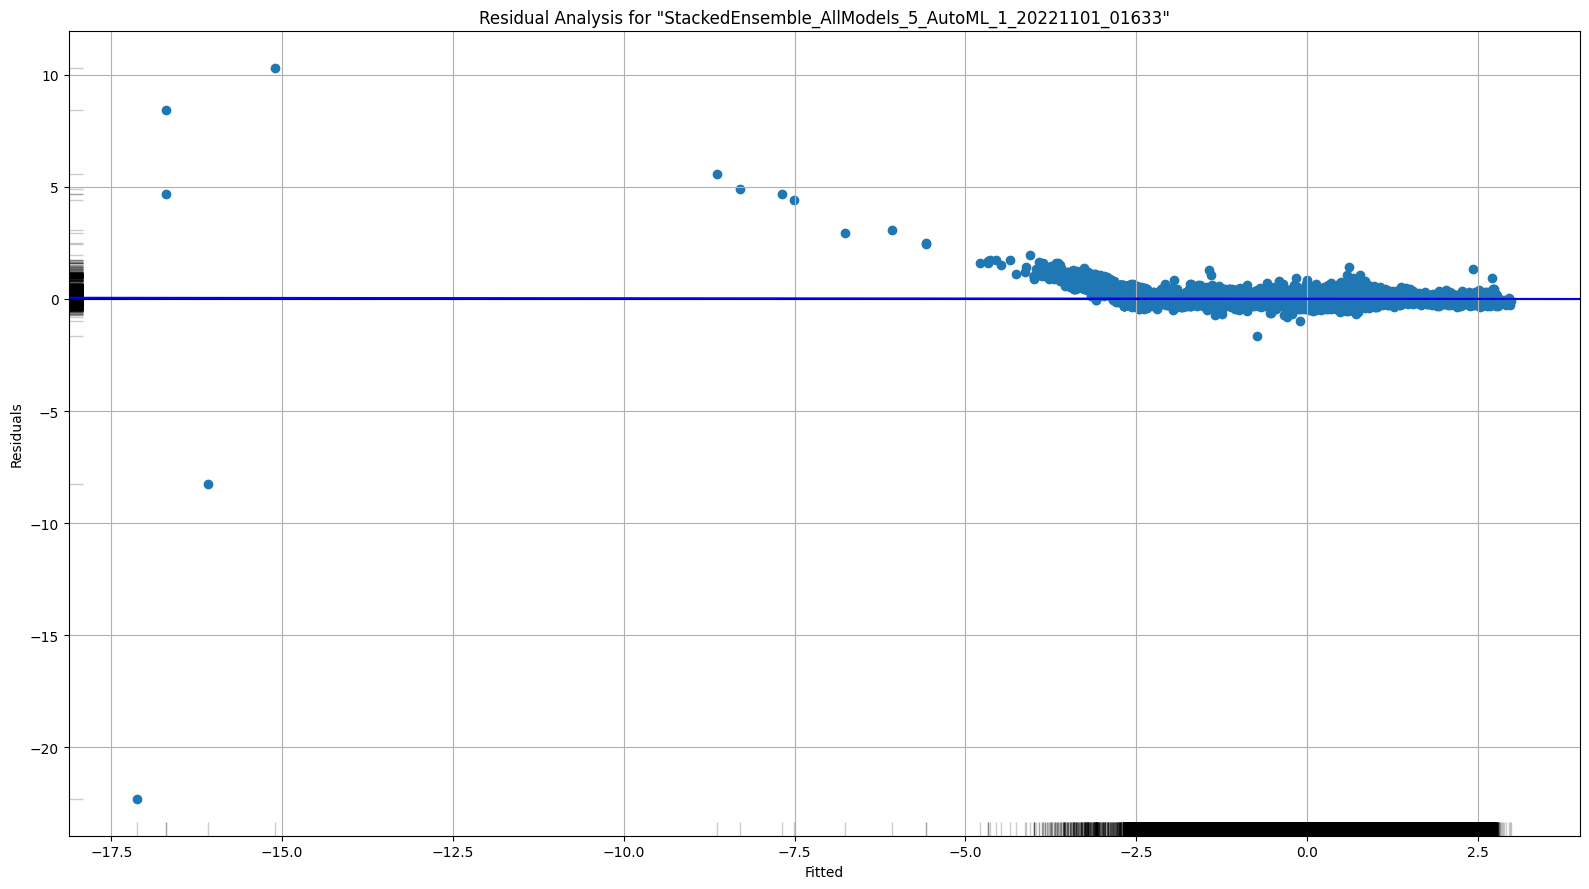

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

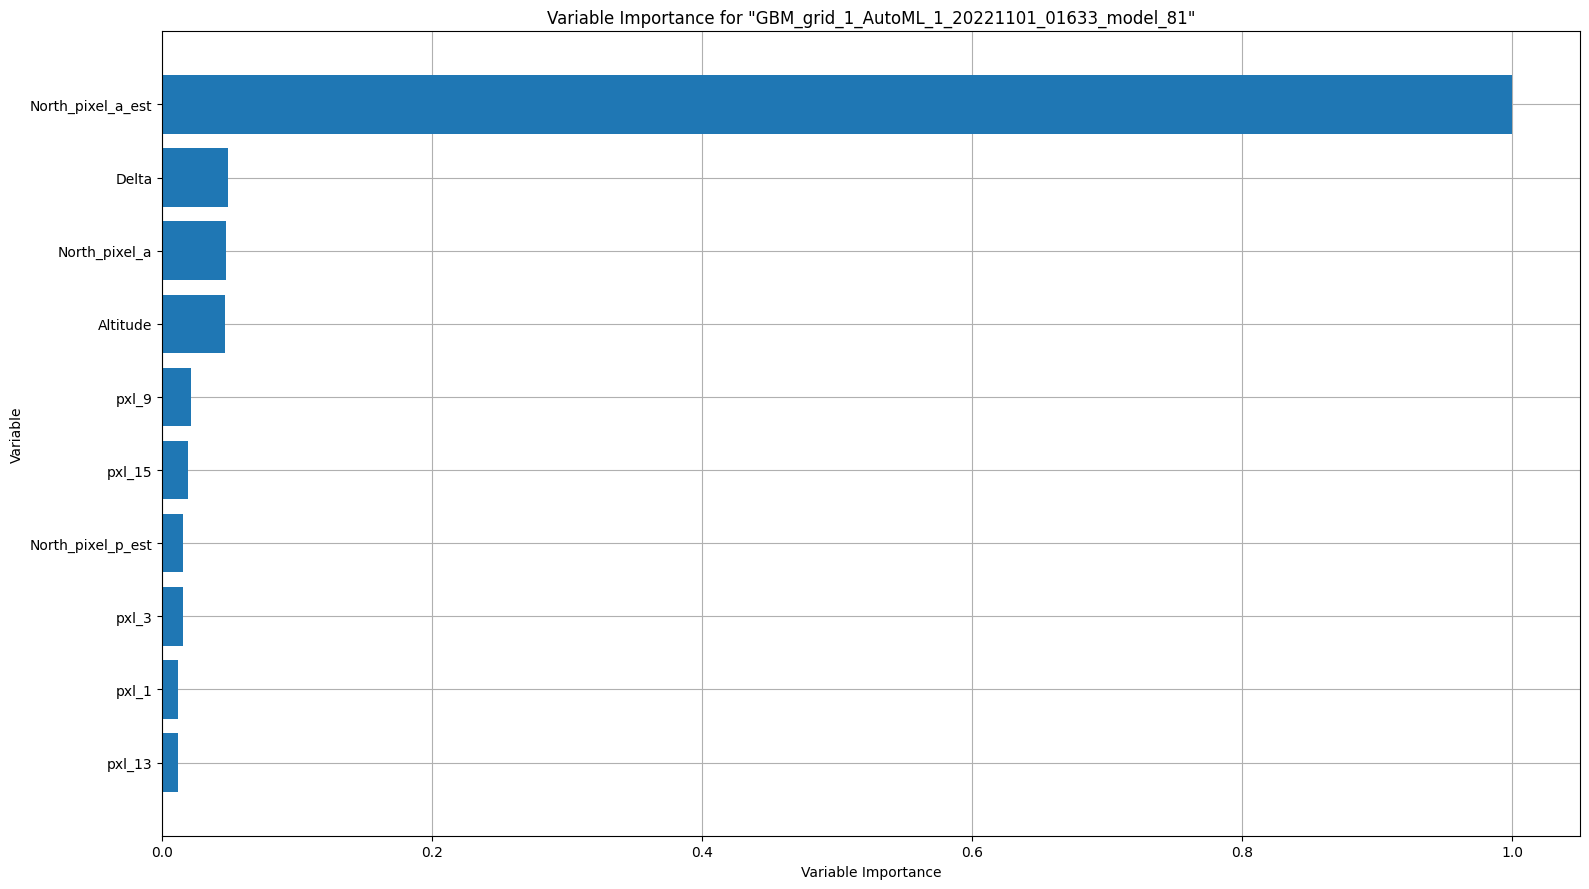

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

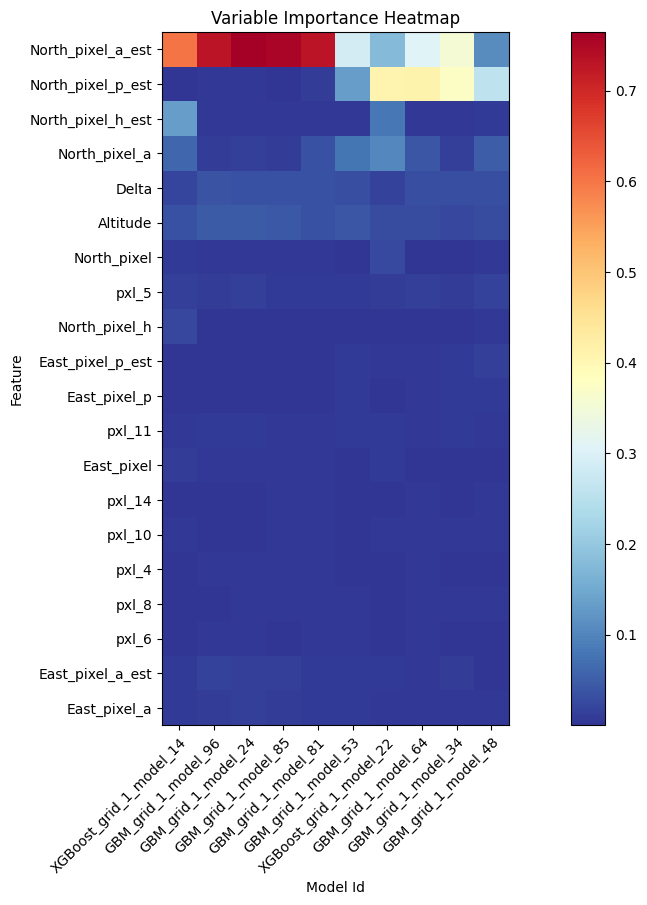

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

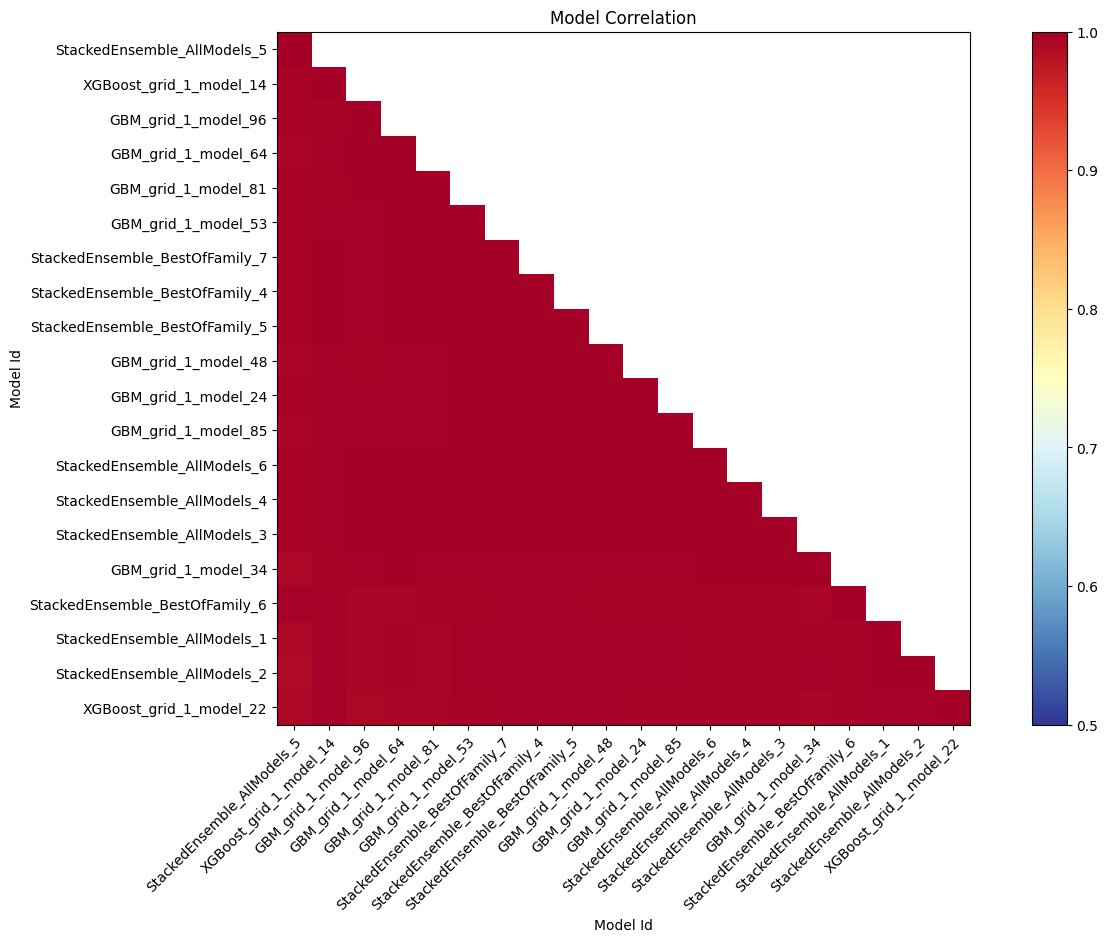

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

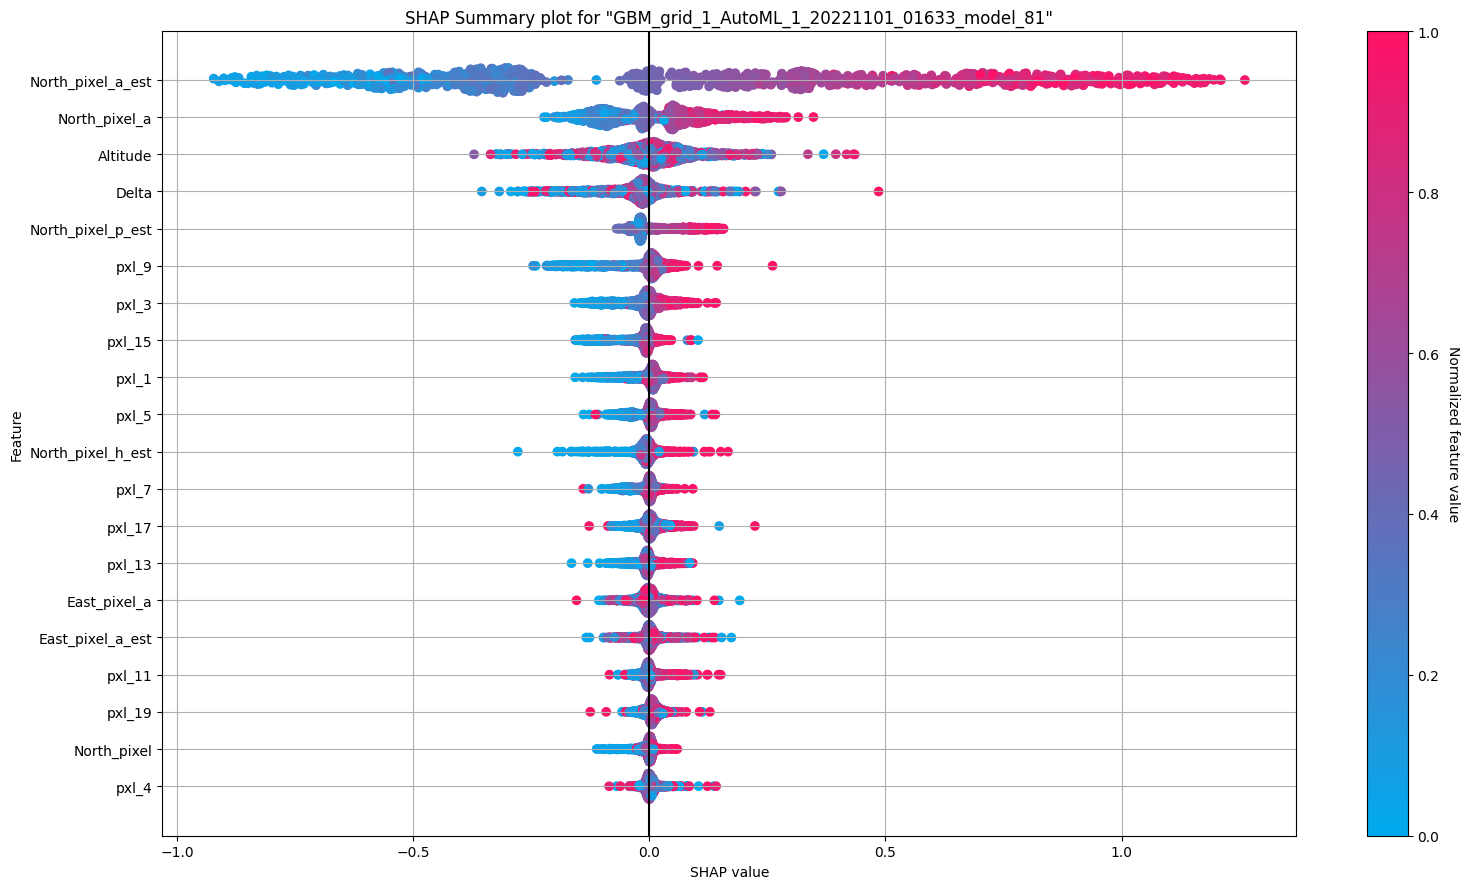

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

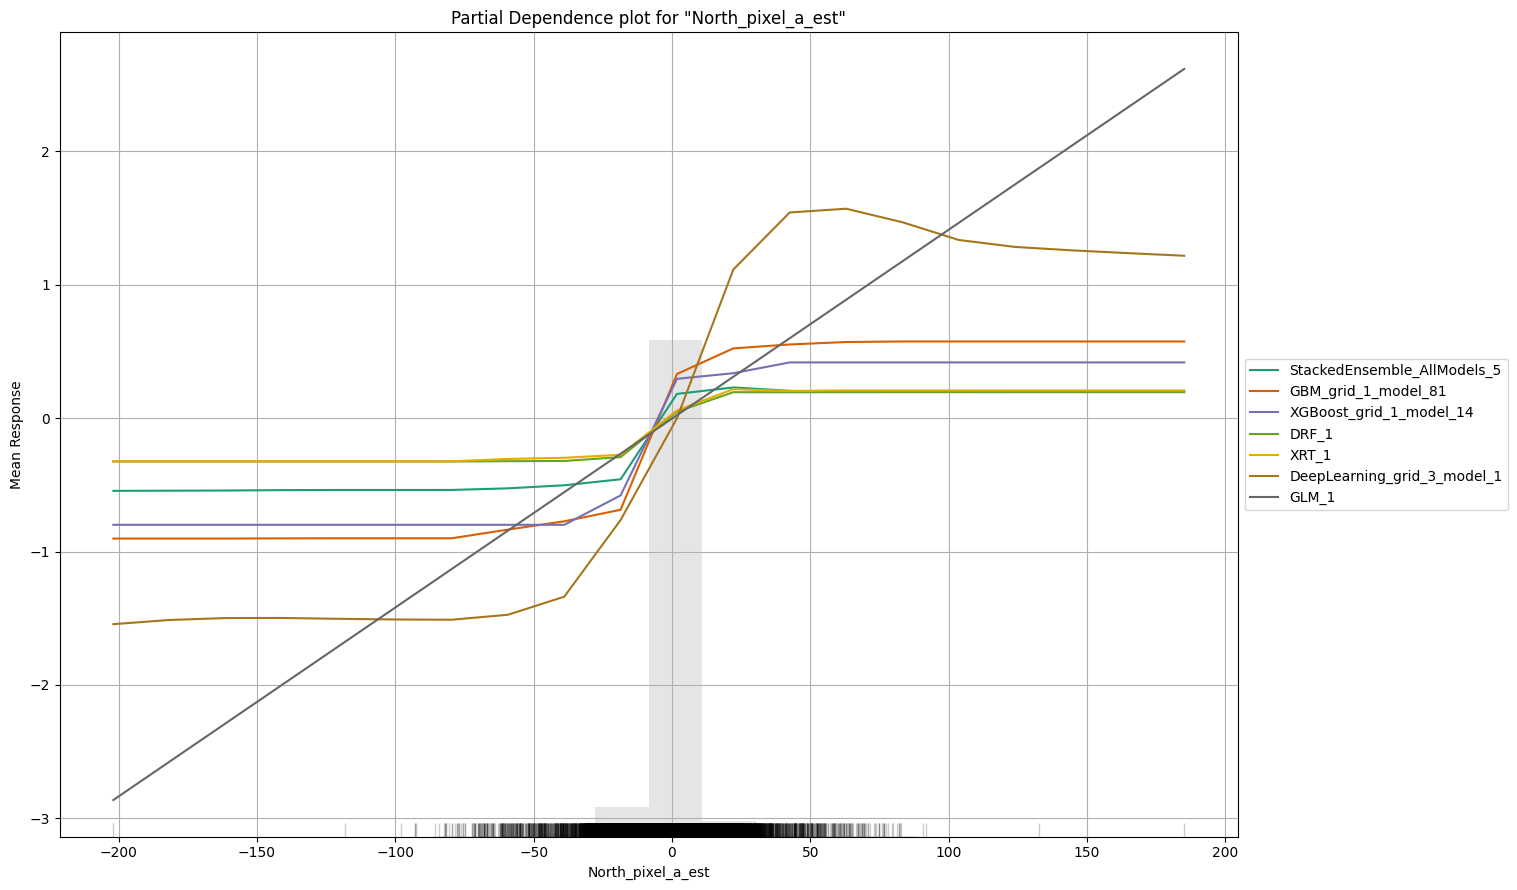

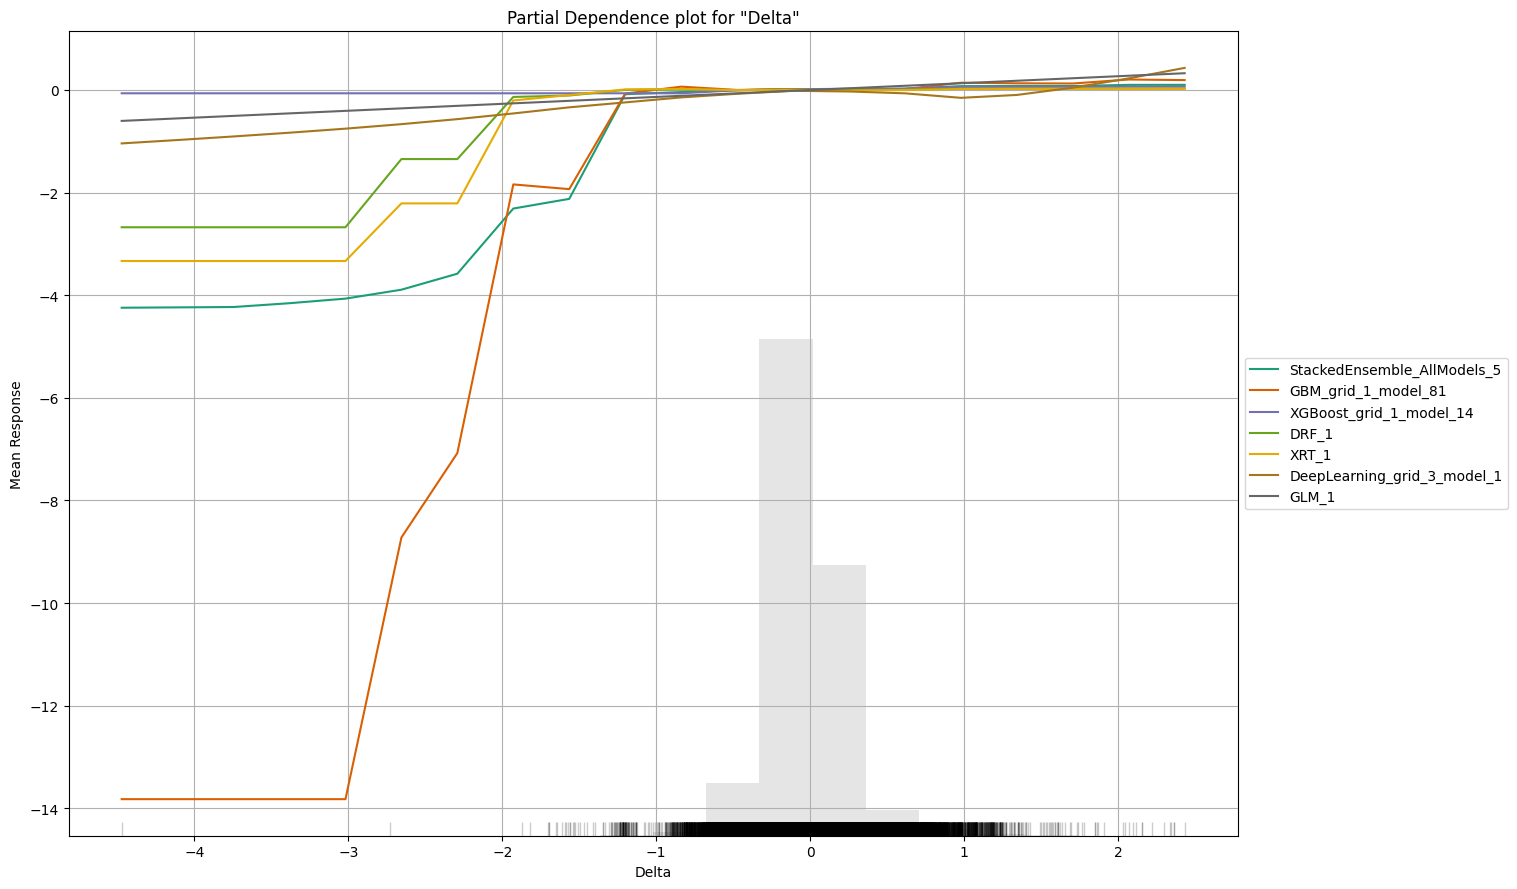

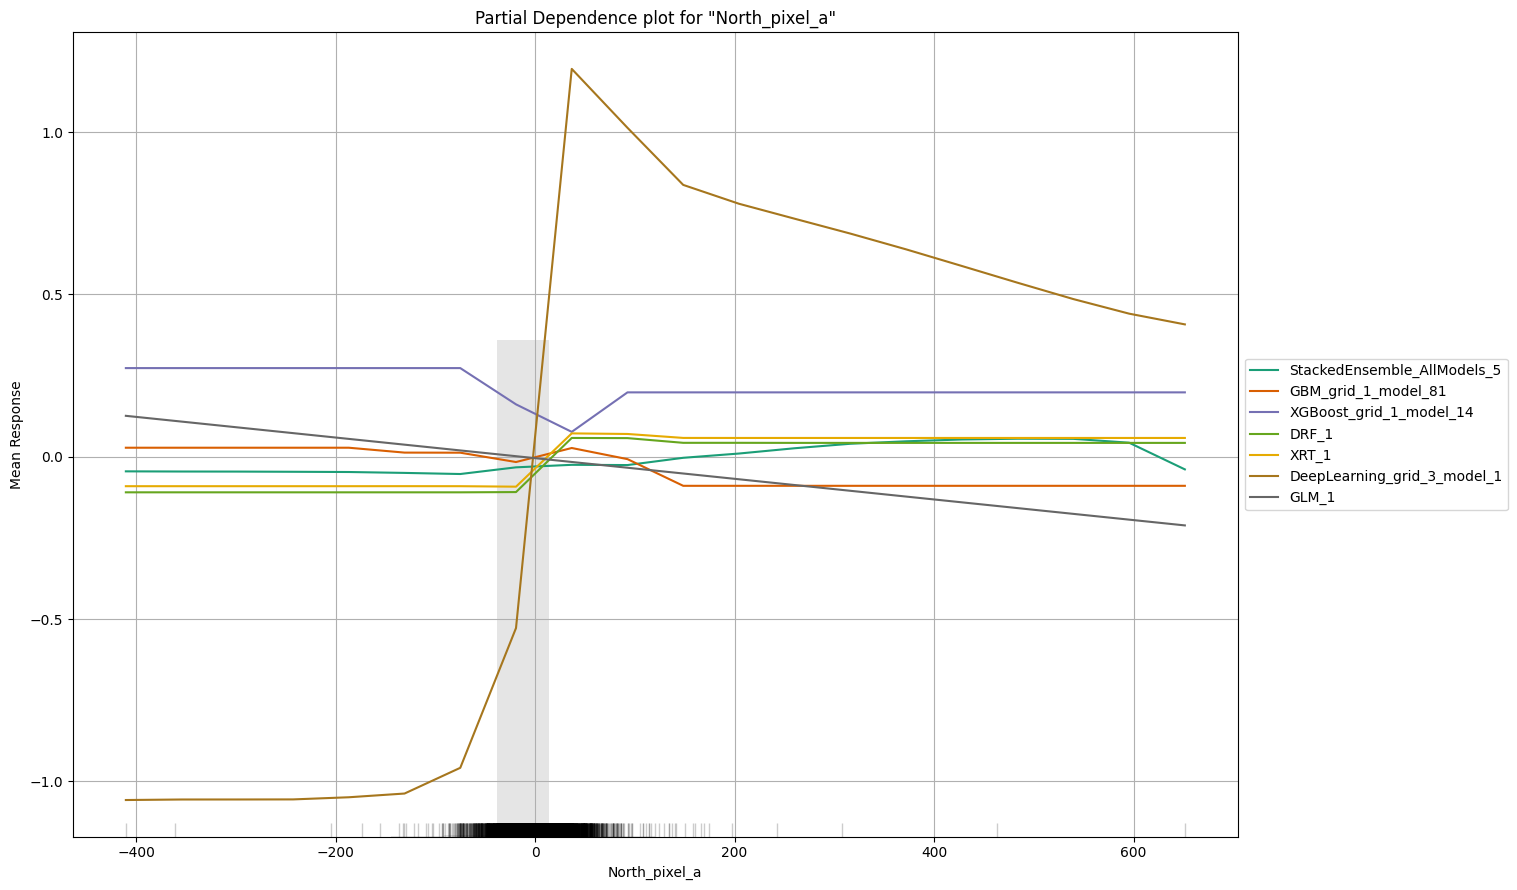

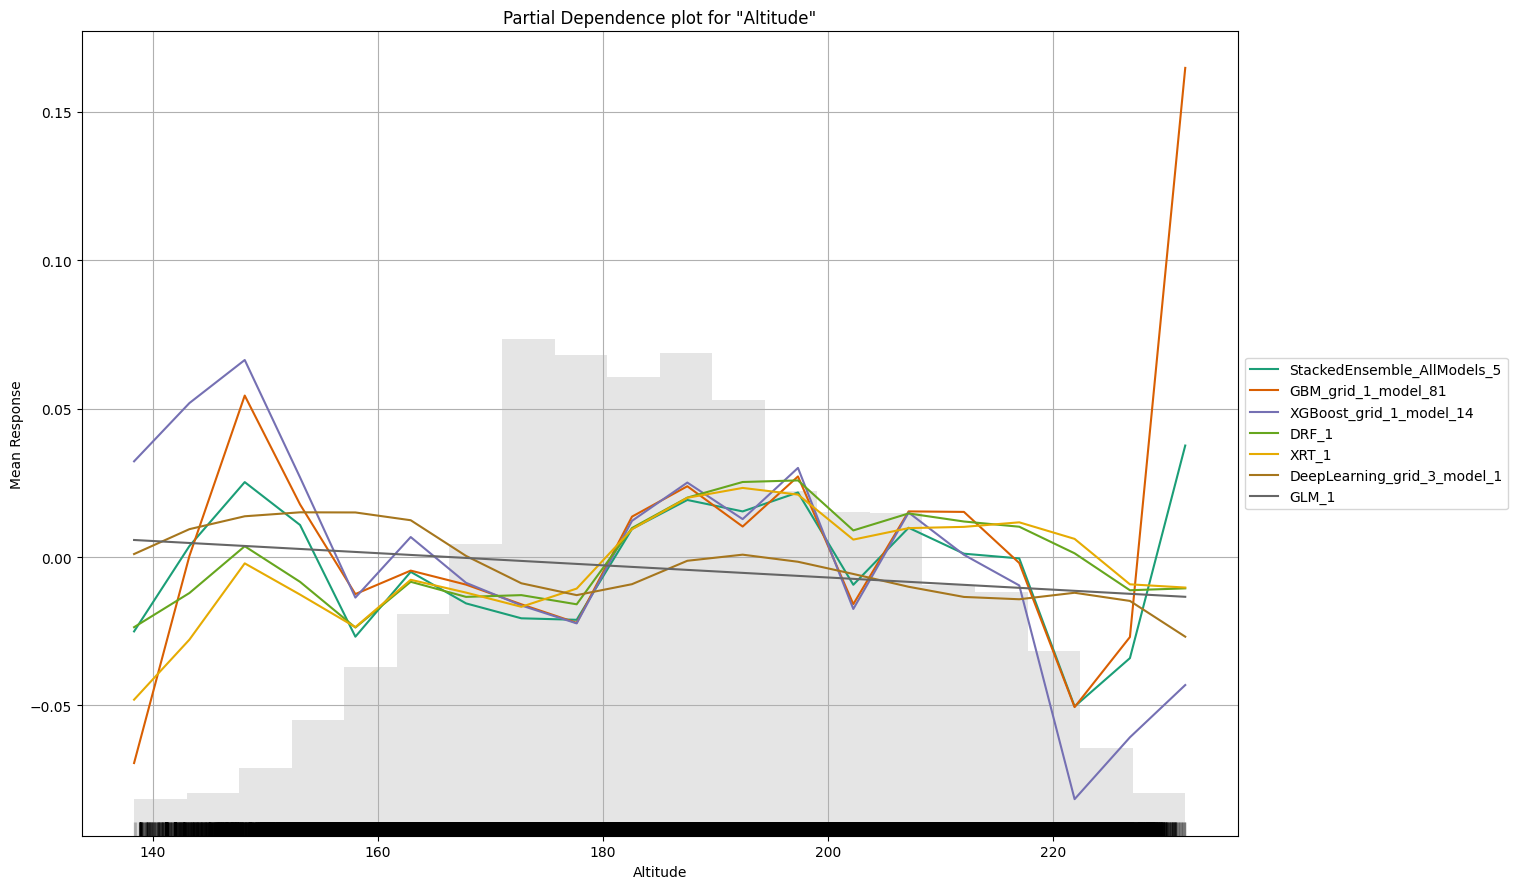

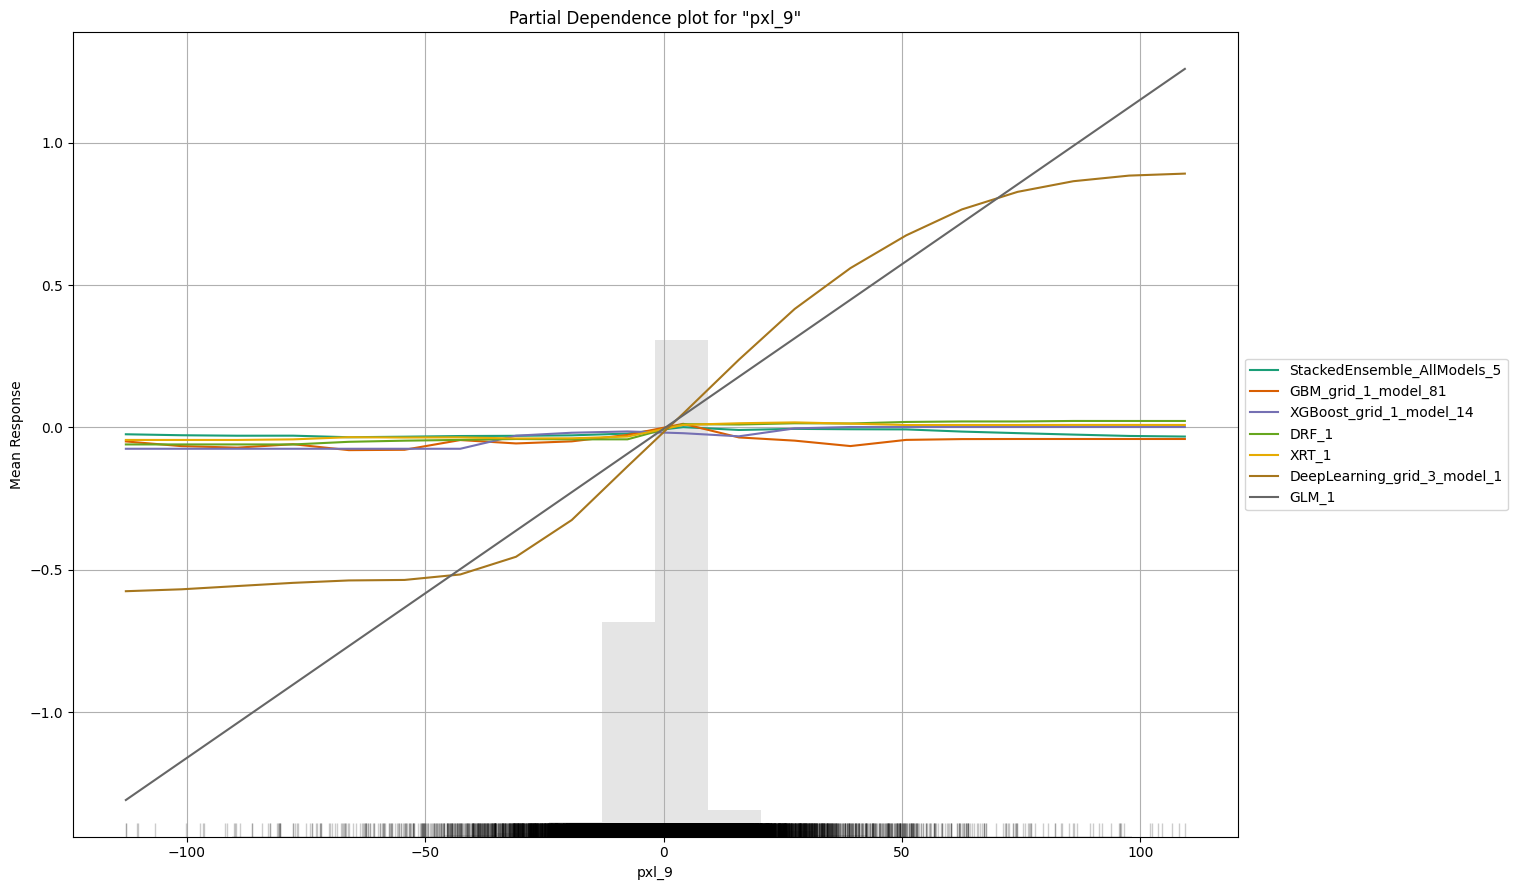

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

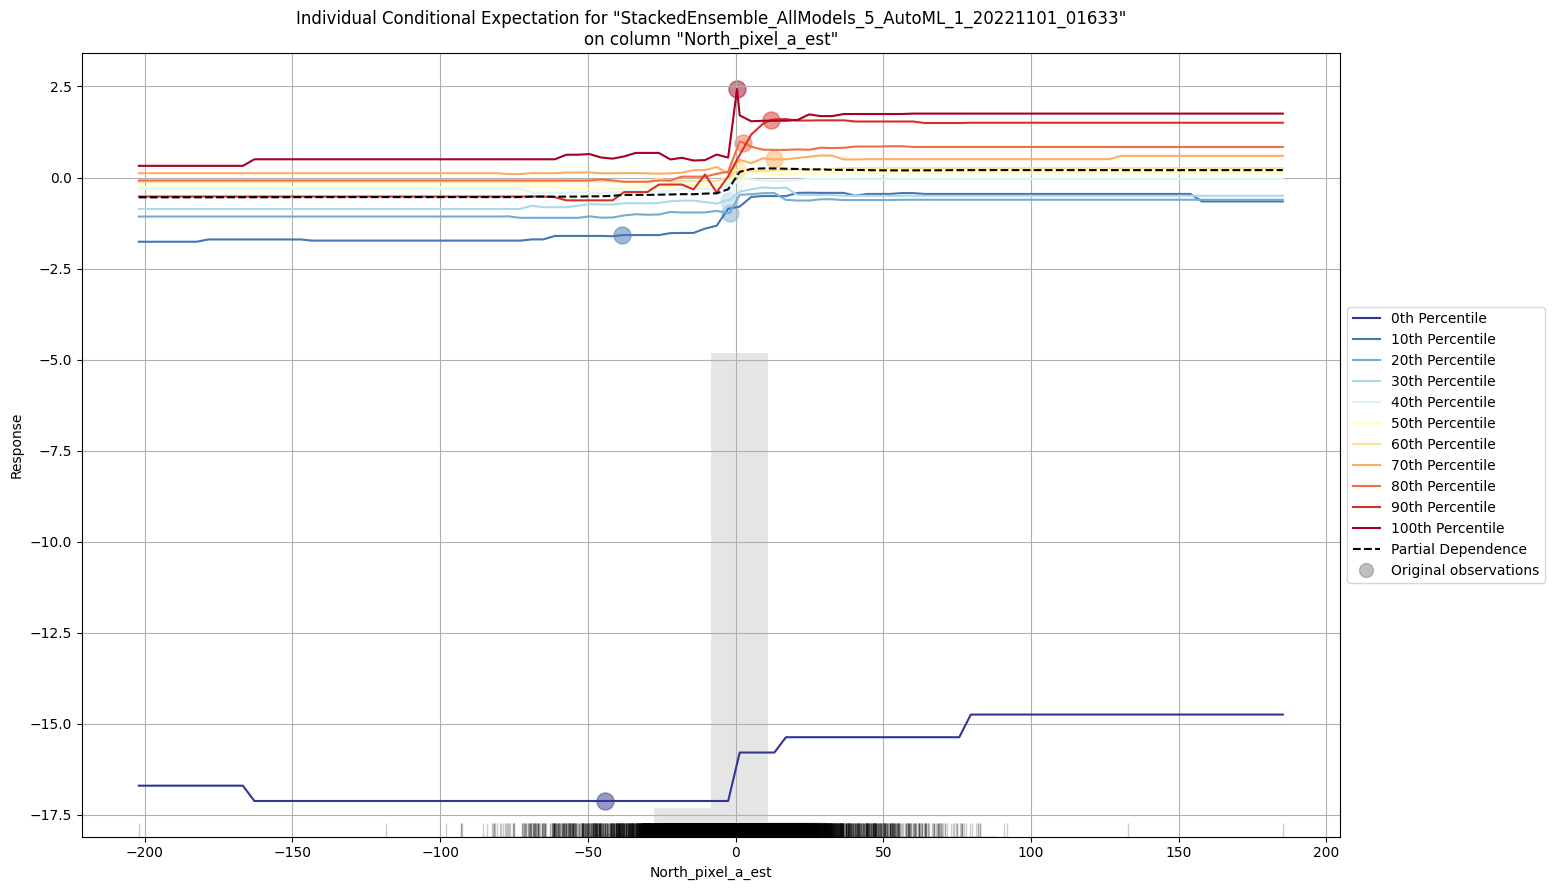

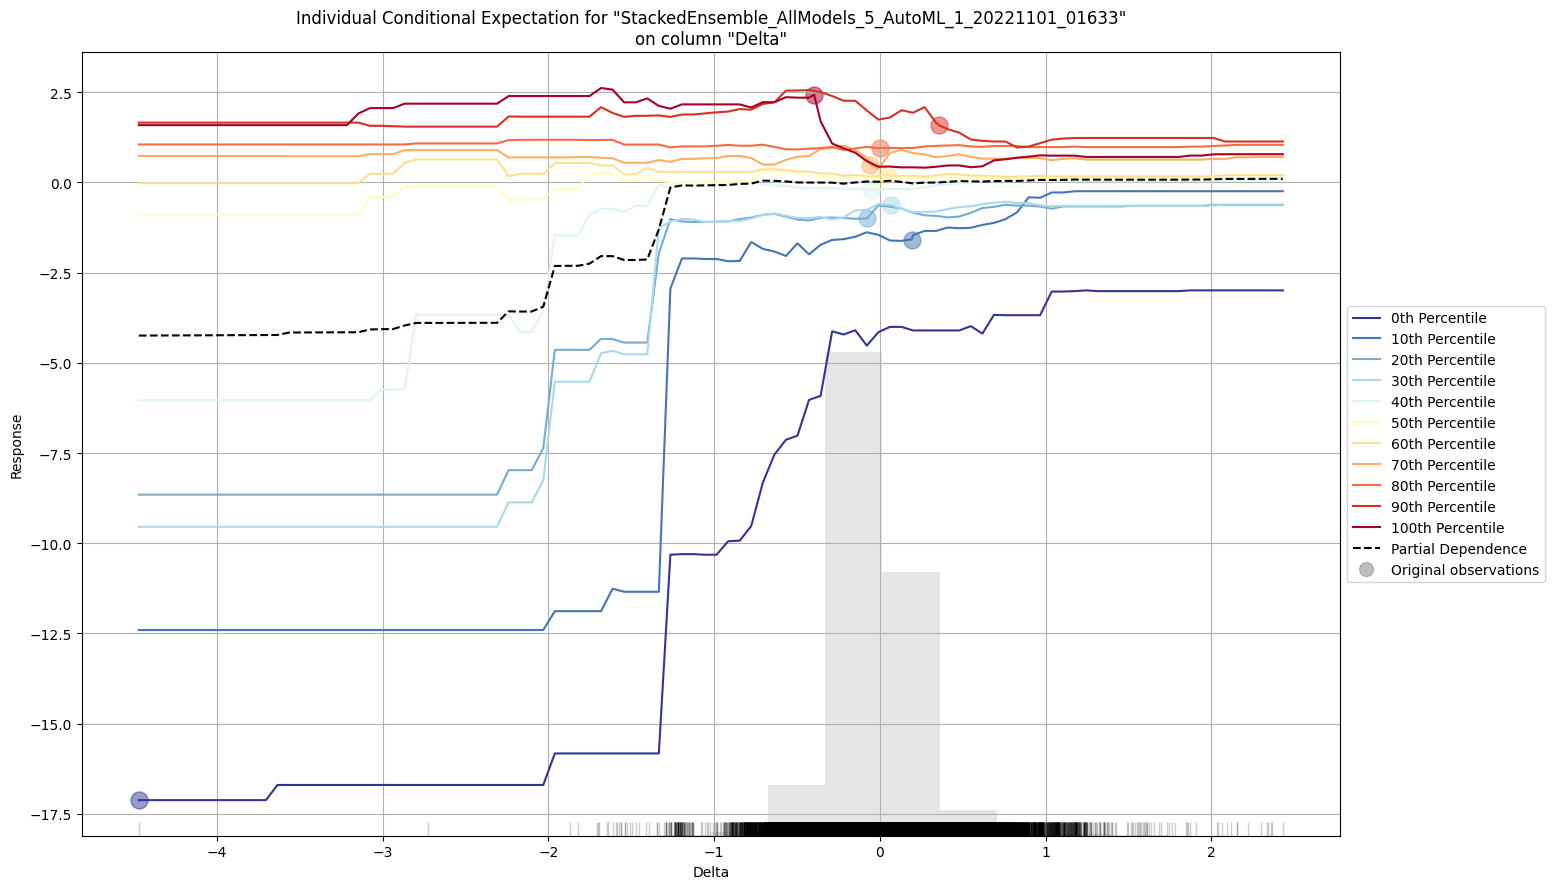

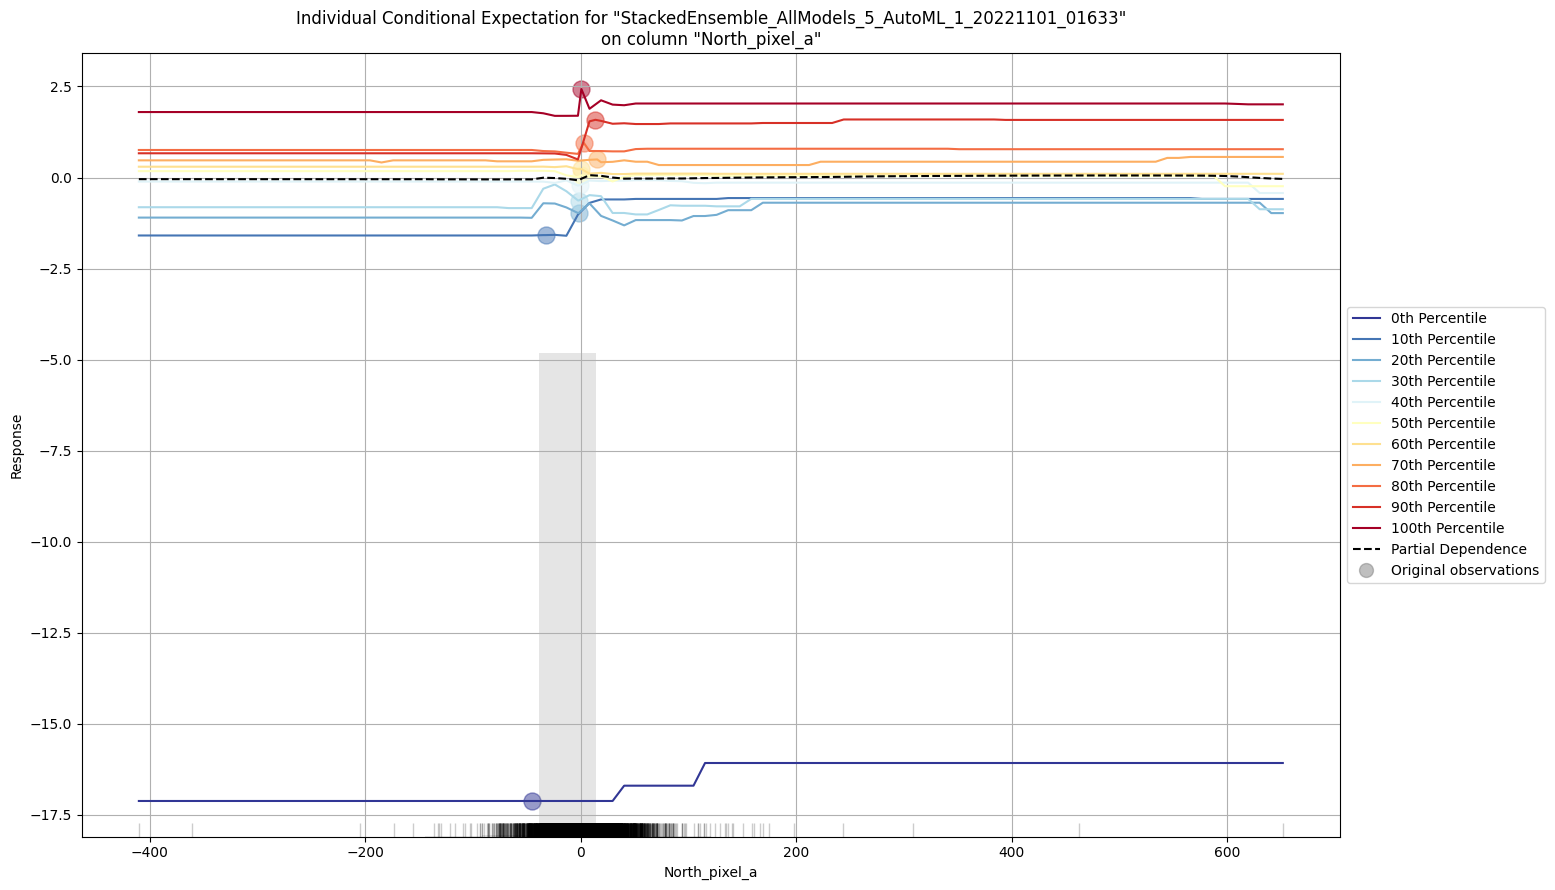

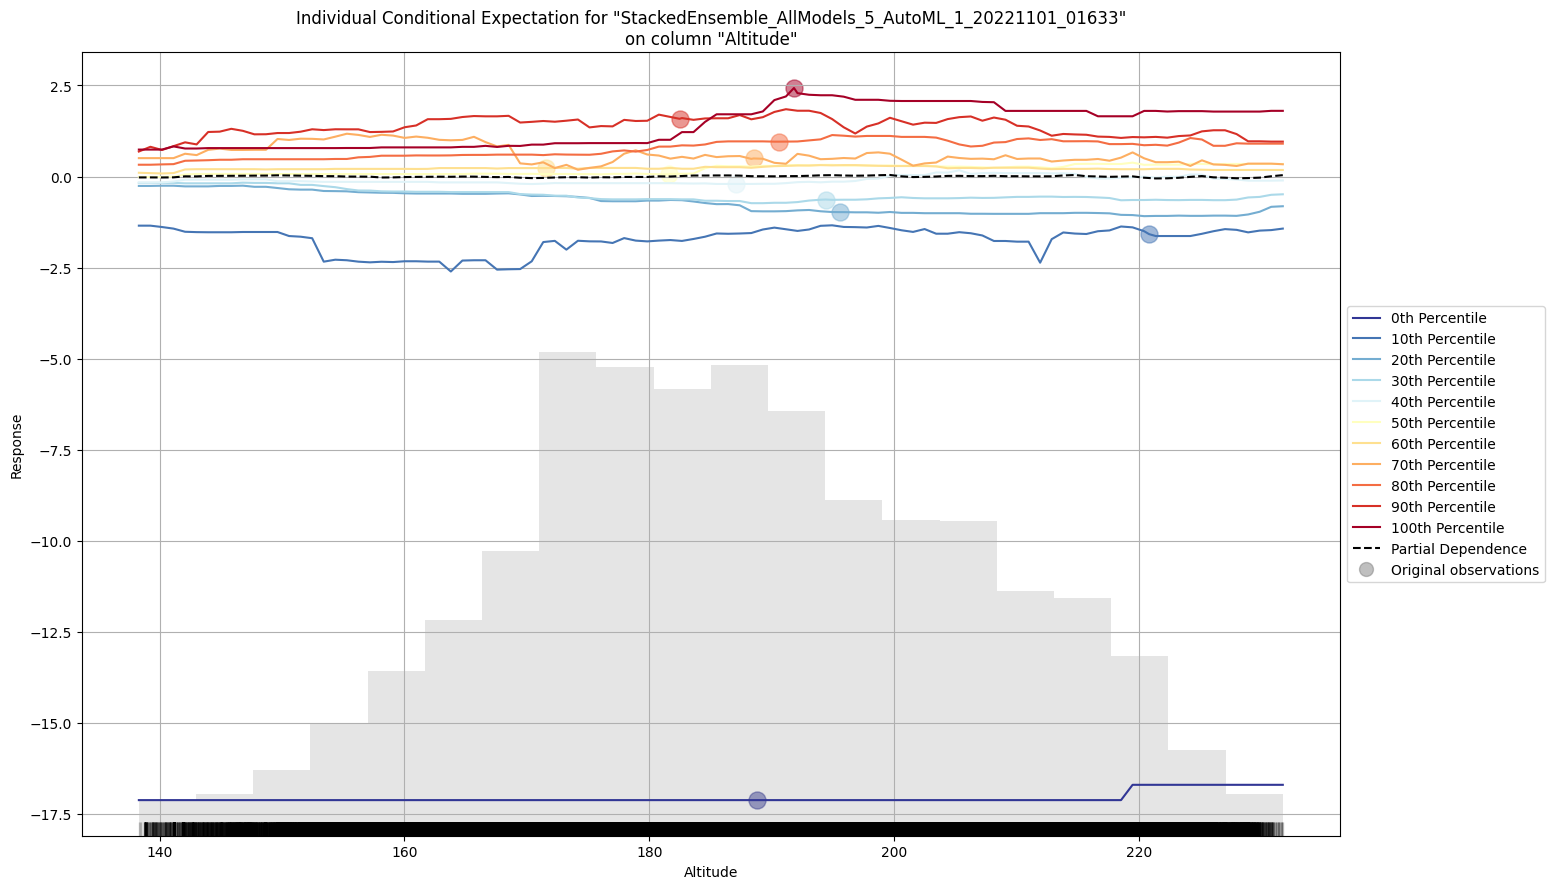

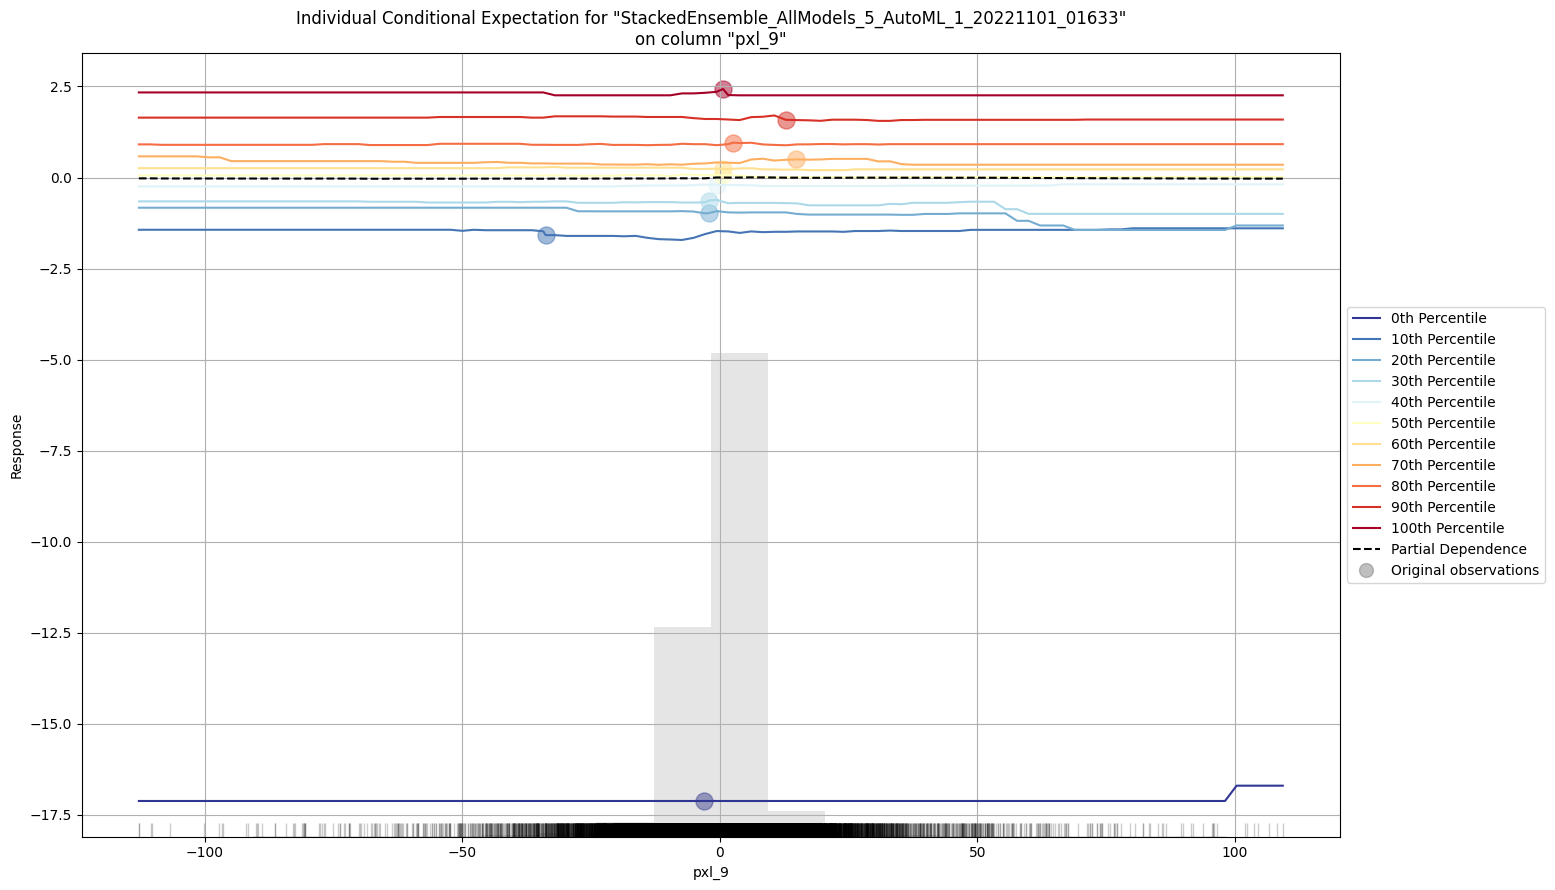

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  rmse          mse        mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ---------  -----------  ---------  -------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20221101_01633_model_96          0.0221879  0.000492304  0.0138506      nan               0.000492304               31422                   0.002835  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_91      0.0301738  0.000910457  0.0188614      nan               0.000910457                7496                   0.000584  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_100     0.0387329  0.00150024   0.0239284      nan               0.00150024                 9660                   0.000758  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_1       0.0416248  0.00173262   0.0282525      nan               0.00173262                 6709                   0.000534  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_3           0.04675    0.00218557   0.0300291      nan               0.00218557                15607                   0.003903  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_19      0.0500093  0.00250093   0.0318869      nan               0.00250093                 5758                   0.000565  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_73      0.0545784  0.0029788    0.0362629      nan               0.0029788                  6122                   0.000506  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_77      0.0563203  0.00317198   0.0352292      nan               0.00317198                 5347                   0.000645  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_10      0.0564222  0.00318347   0.0345827      nan               0.00318347                 4461                   0.000664  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_3       0.057524   0.00330901   0.0354205      nan               0.00330901                 4224                   0.000622  XGBoost
StackedEnsemble_AllModels_6_AutoML_1_20221101_01633  0.0603962  0.0036477    0.0336208      nan               0.0036477                  7518                   0.04301   StackedEnsemble
XGBoost_grid_1_AutoML_1_20221101_01633_model_119     0.06047    0.00365662   0.0399462      nan               0.00365662                10680                   0.000861  XGBoost
StackedEnsemble_AllModels_3_AutoML_1_20221101_01633  0.0618176  0.00382141   0.0342298      nan               0.00382141                 2343                   0.029102  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20221101_01633  0.0627249  0.00393441   0.0348399      nan               0.00393441                 2403                   0.027506  StackedEnsemble
XGBoost_grid_1_AutoML_1_20221101_01633_model_53      0.0694685  0.00482587   0.0442858      nan               0.00482587                 5177                   0.000686  XGBoost
XGBoost_grid_1_AutoML_1_20221101_01633_model_7       0.0716484  0.00513349   0.0435316      nan               0.00513349                 3551                   0.000538  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_81          0.0737631  0.00544099   0.0467814      nan               0.00544099                21620                   0.005741  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_23      0.0751582  0.00564876   0.0441963      nan               0.00564876                 3994                   0.000485  XGBoost
GBM_grid_1_AutoML_1_20221101_01633_model_97          0.0766927  0.00588176   0.0475526      nan               0.00588176                10123                   0.002587  GBM
XGBoost_grid_1_AutoML_1_20221101_01633_model_11      0.0776041  0.00602239   0.0477608      nan               0.00602239                 5037                   0.000719  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [14]:
north_aml.explain(train)

# East Explanation

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  rmse         mse        mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ---------  ----------  ---------  -------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_2_20221101_11701_model_91      0.0243965  0.00059519  0.0152925      nan                0.00059519                8517                   0.000558  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_100     0.035432   0.00125543  0.0221555      nan                0.00125543                9590                   0.000692  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_1       0.042624   0.0018168   0.0287815      nan                0.0018168                 6493                   0.000493  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_19      0.0466179  0.00217323  0.0299019      nan                0.00217323                5796                   0.000514  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_73      0.0473795  0.00224482  0.0320167      nan                0.00224482                6878                   0.000534  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_23      0.0493846  0.00243884  0.0304053      nan                0.00243884                5734                   0.000595  XGBoost
GBM_grid_1_AutoML_2_20221101_11701_model_3           0.0508028  0.00258093  0.0324062      nan                0.00258093               13742                   0.003527  GBM
XGBoost_grid_1_AutoML_2_20221101_11701_model_77      0.052082   0.00271254  0.0330239      nan                0.00271254                5428                   0.000607  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_104     0.0536664  0.00288008  0.0296312      nan                0.00288008               14435                   0.001086  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_10      0.0552776  0.00305561  0.0343361      nan                0.00305561                4359                   0.000566  XGBoost
GBM_grid_1_AutoML_2_20221101_11701_model_96          0.0561418  0.0031519   0.0318846      nan                0.0031519                18526                   0.001496  GBM
XGBoost_grid_1_AutoML_2_20221101_11701_model_7       0.0563849  0.00317926  0.0348585      nan                0.00317926                4141                   0.000578  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_70      0.0590244  0.00348388  0.0355655      nan                0.00348388                4442                   0.000593  XGBoost
StackedEnsemble_AllModels_6_AutoML_2_20221101_11701  0.0602389  0.00362873  0.0333371      nan                0.00362873                7958                   0.043146  StackedEnsemble
XGBoost_grid_1_AutoML_2_20221101_11701_model_3       0.0604109  0.00364948  0.0365763      nan                0.00364948                3797                   0.000525  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_69      0.0622789  0.00387866  0.0392226      nan                0.00387866                9504                   0.000755  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_53      0.0665833  0.00443334  0.0424879      nan                0.00443334                5130                   0.000623  XGBoost
StackedEnsemble_AllModels_3_AutoML_2_20221101_11701  0.0684589  0.00468662  0.036891       nan                0.00468662                1960                   0.027817  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20221101_11701  0.068462   0.00468705  0.036894       nan                0.00468705                1915                   0.027933  StackedEnsemble
XGBoost_grid_1_AutoML_2_20221101_11701_model_16      0.0684663  0.00468764  0.0432077      nan                0.00468764                5750                   0.000649  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

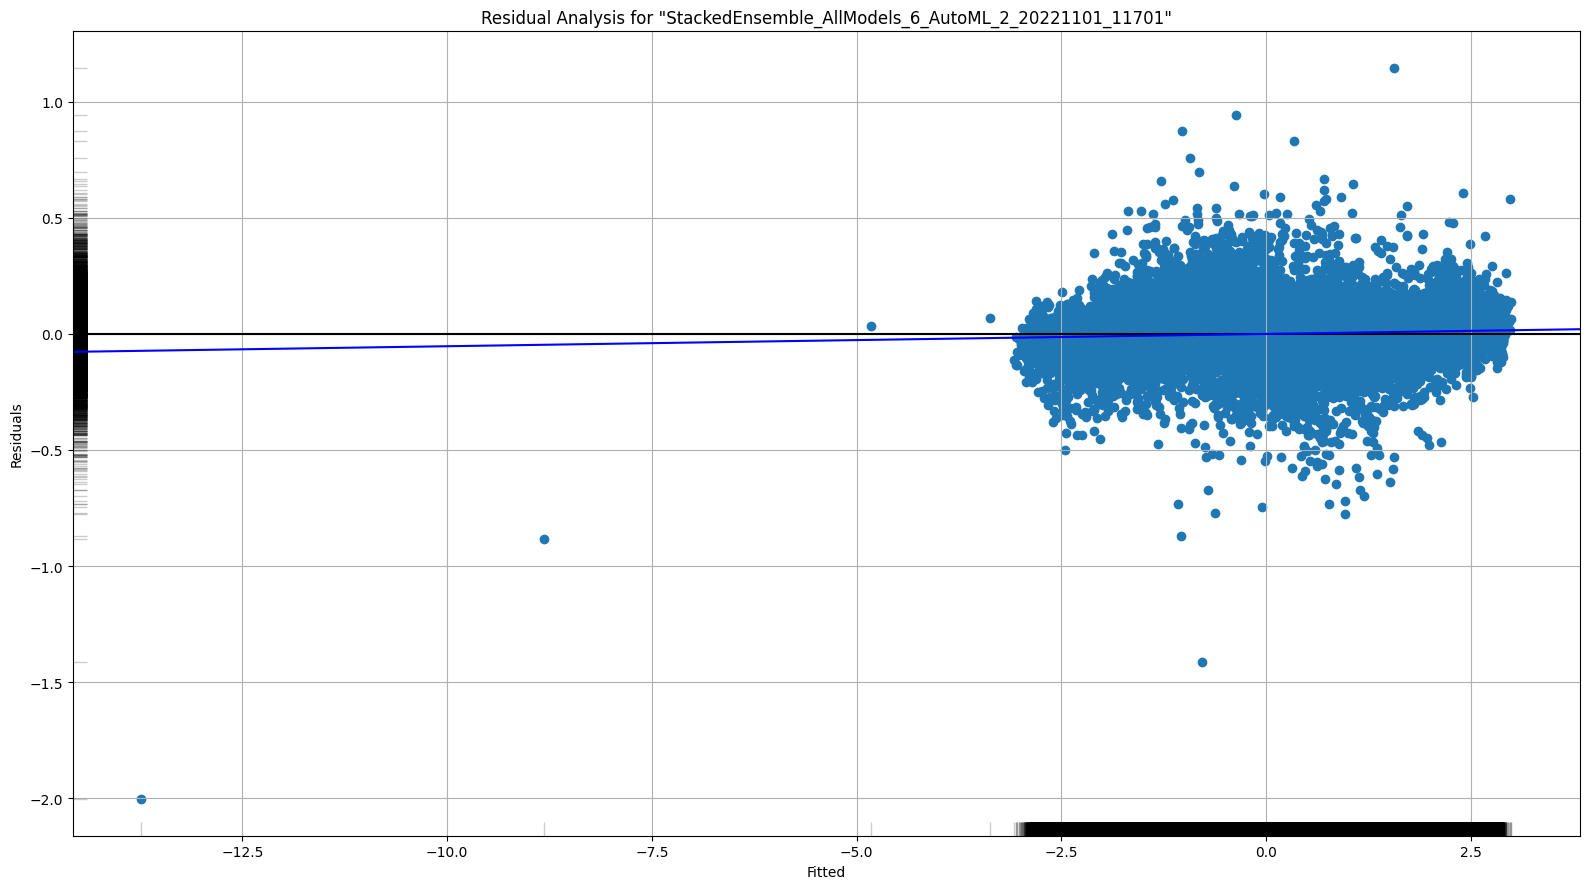

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

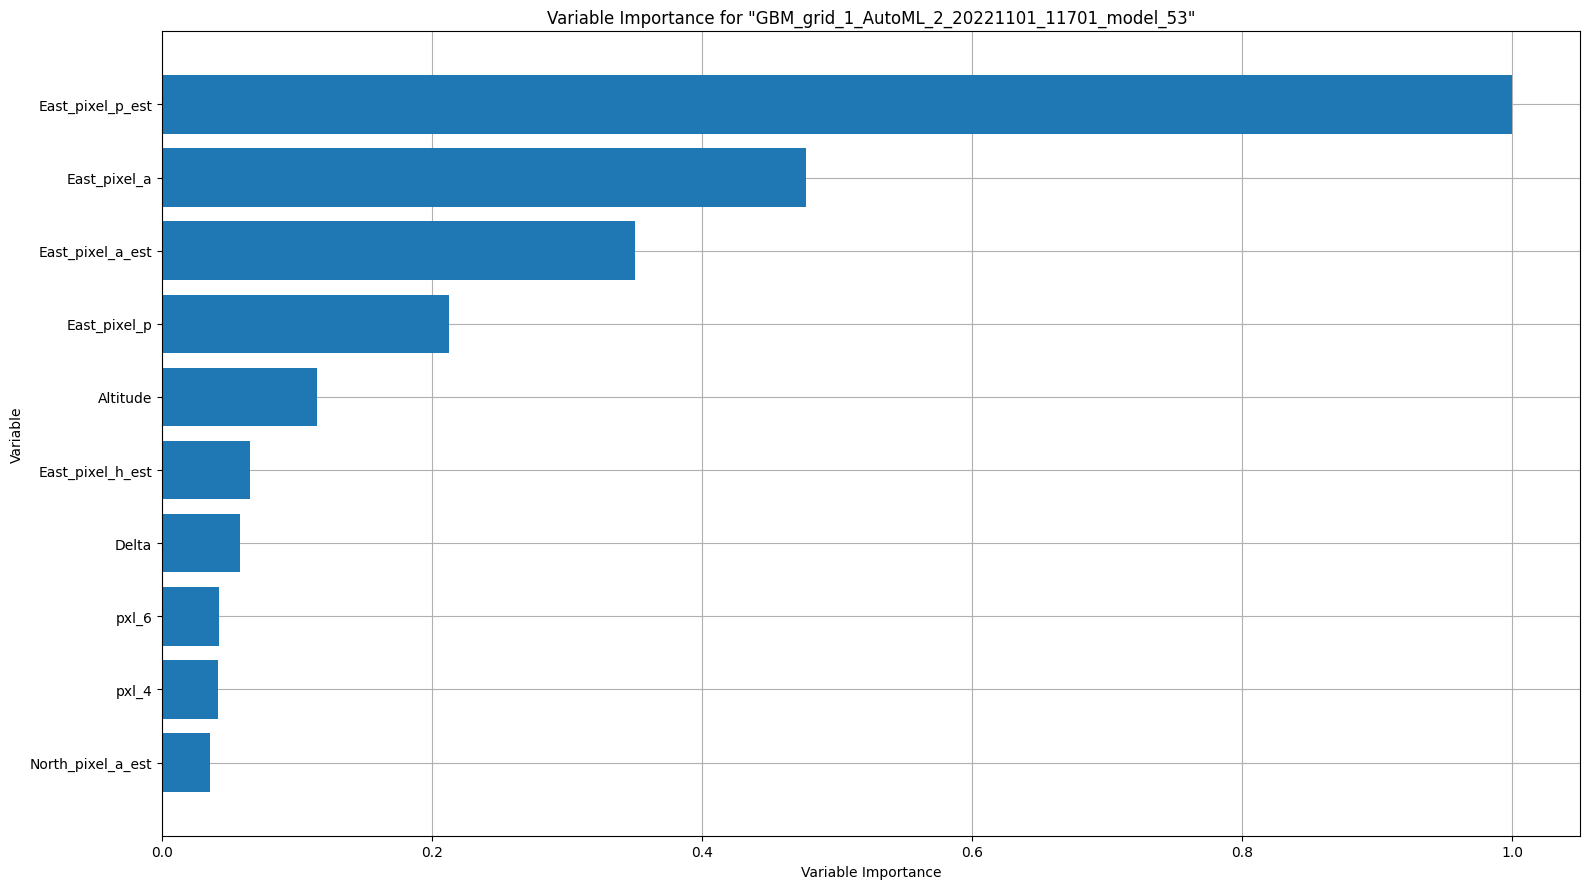

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

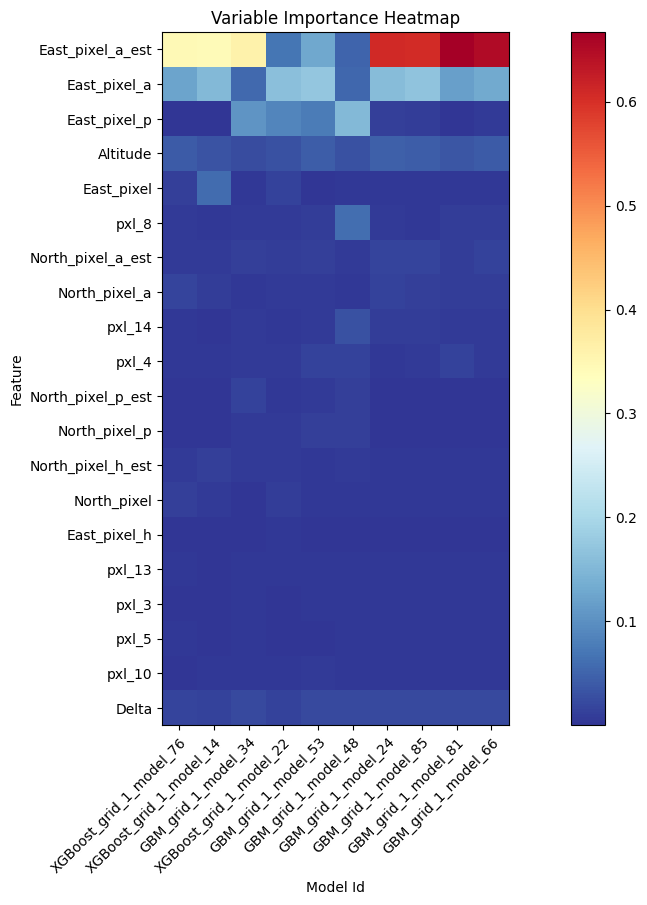

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

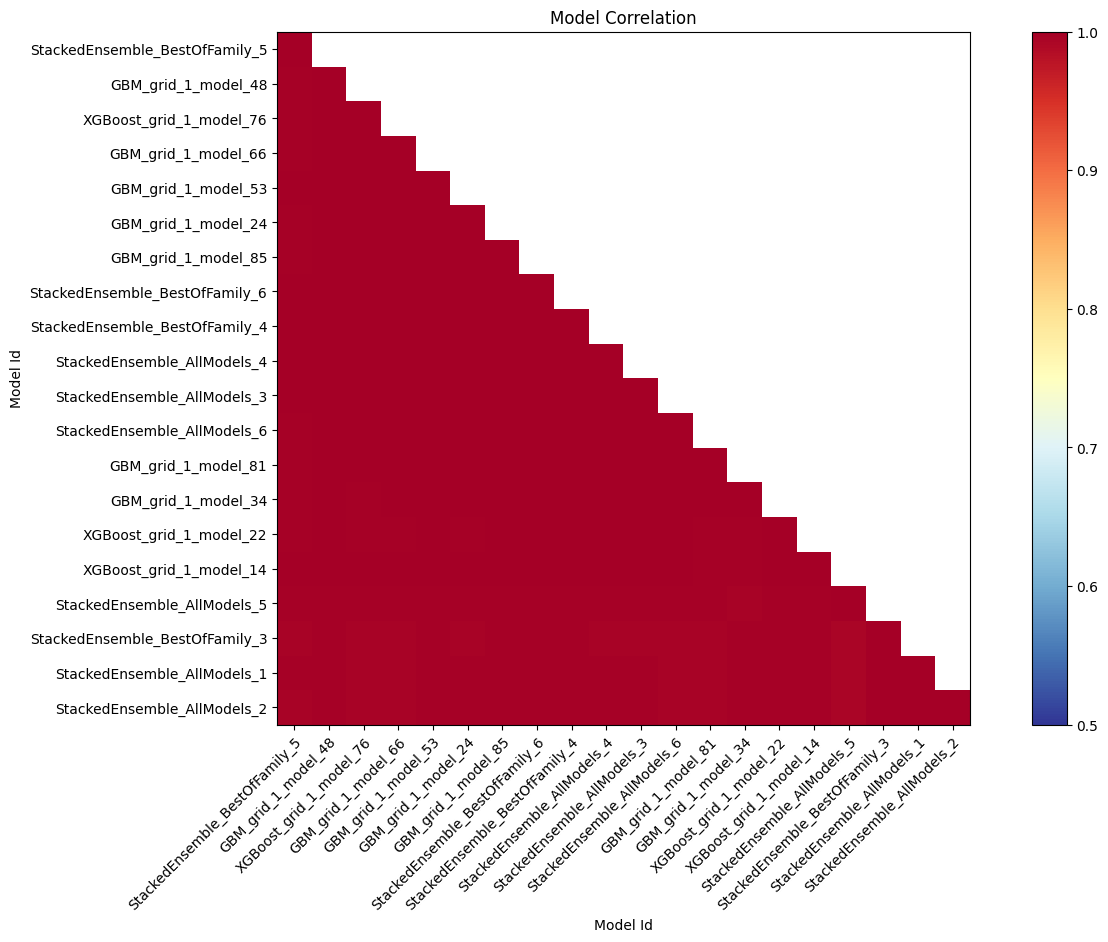

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

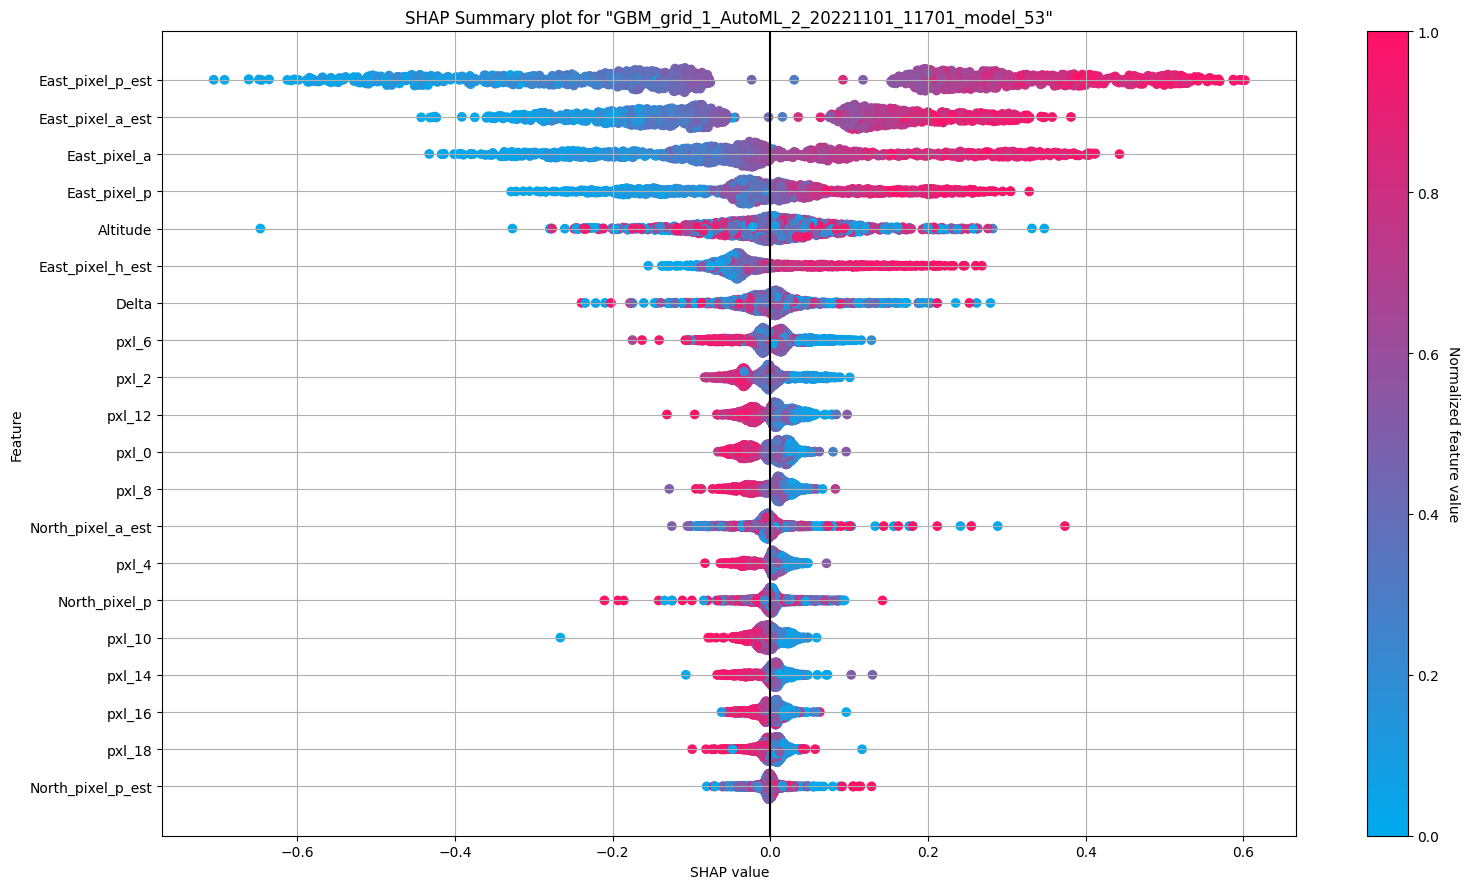

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

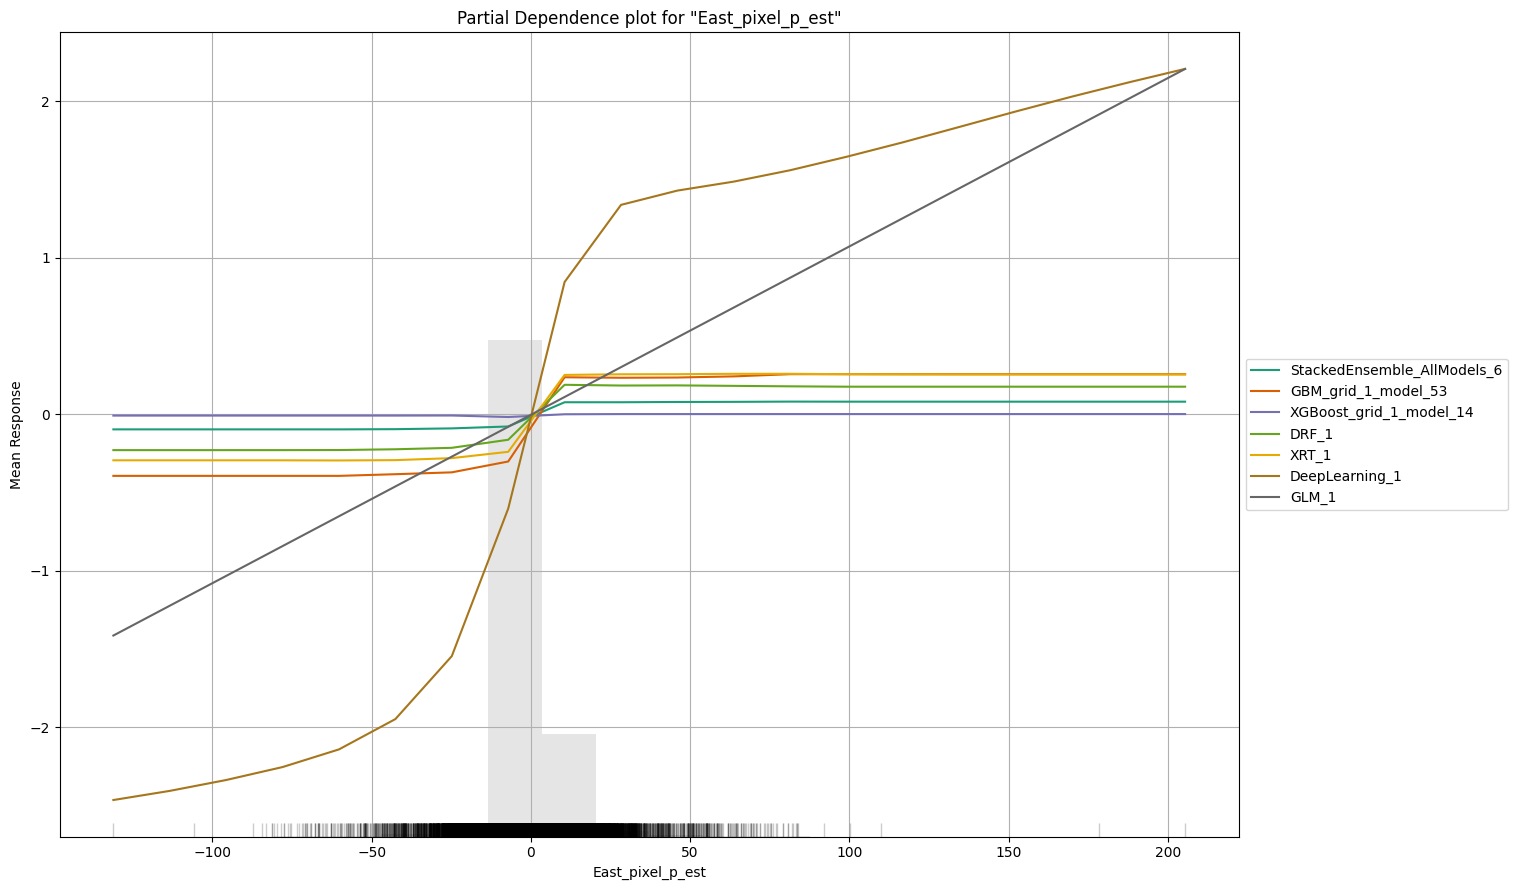

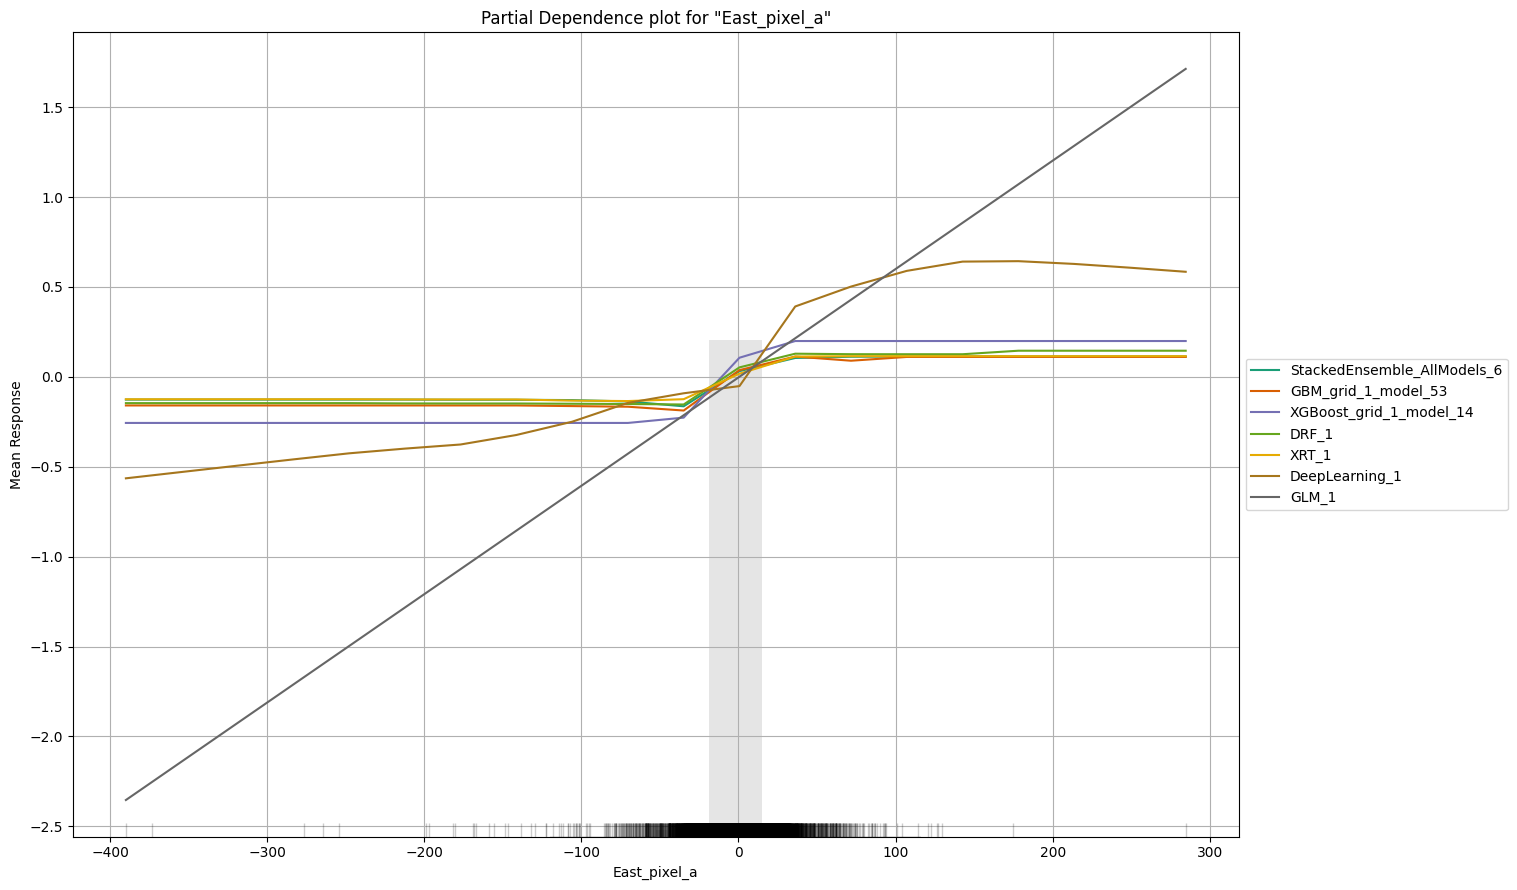

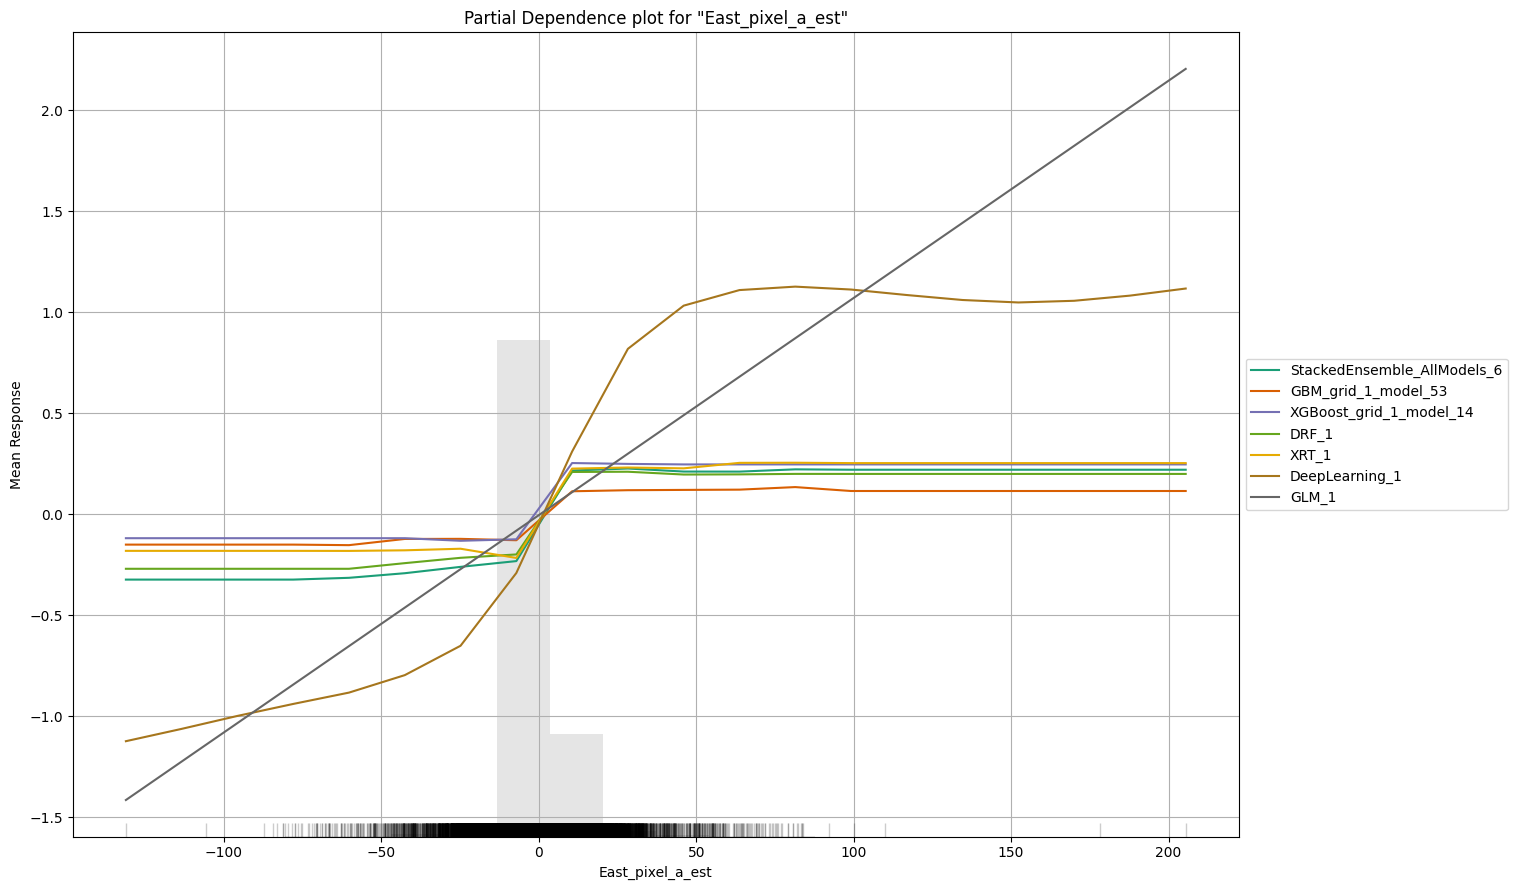

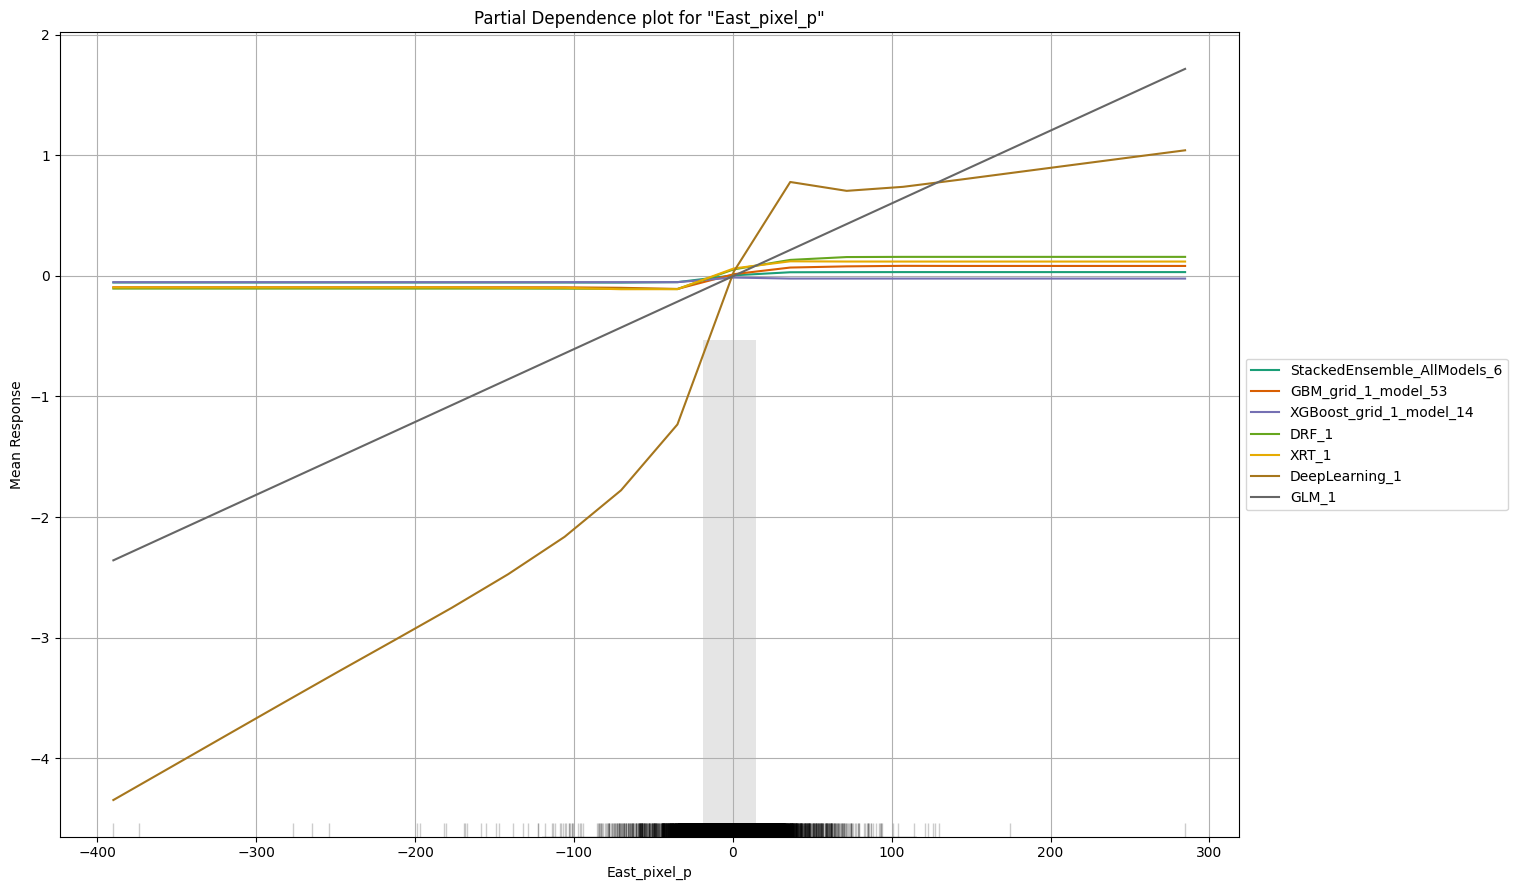

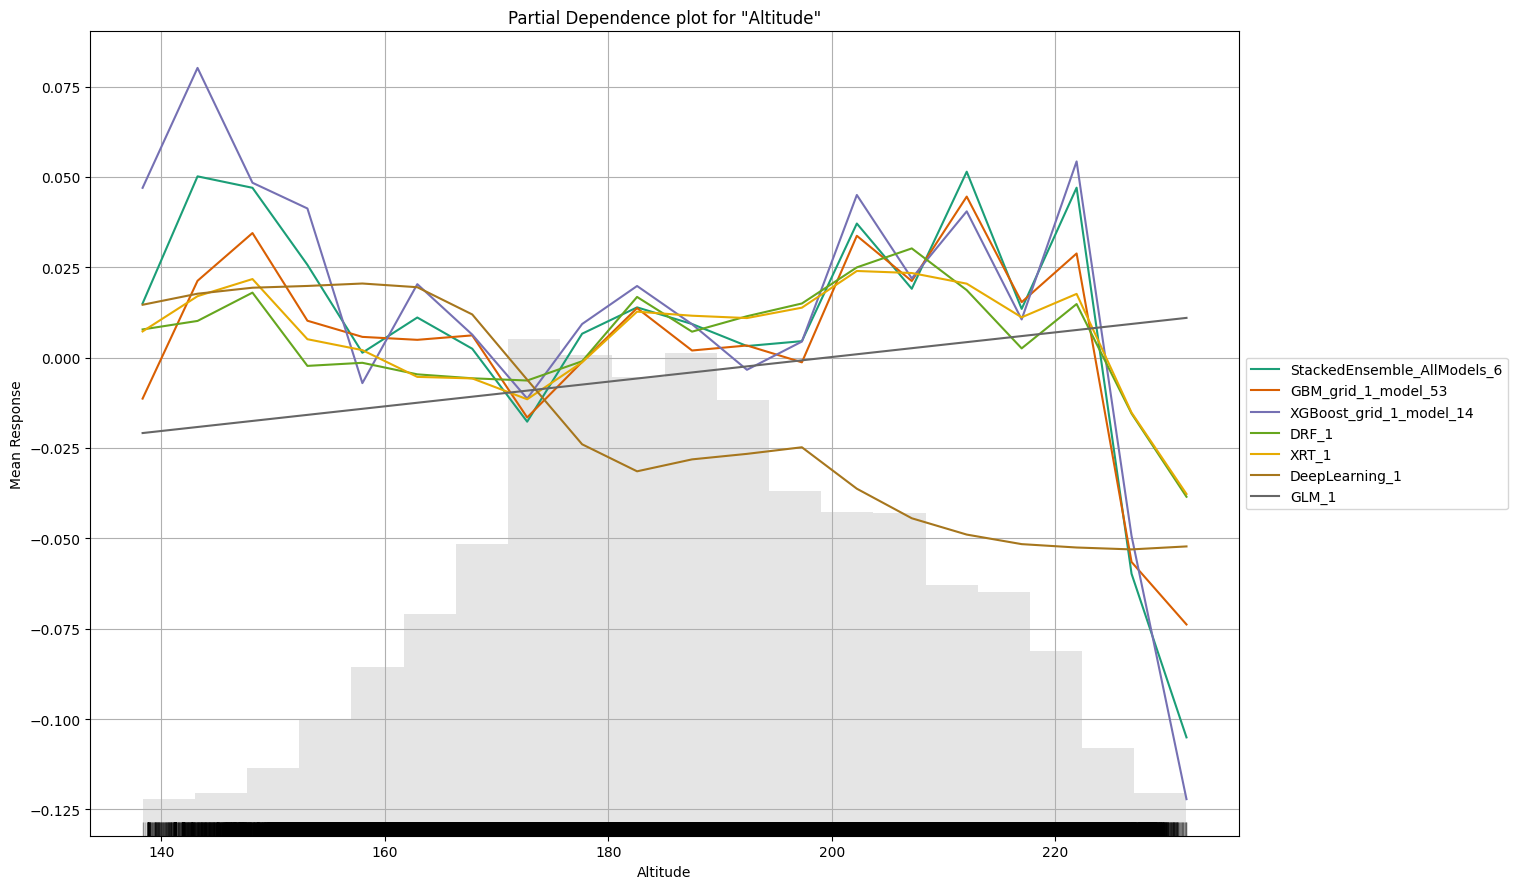

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

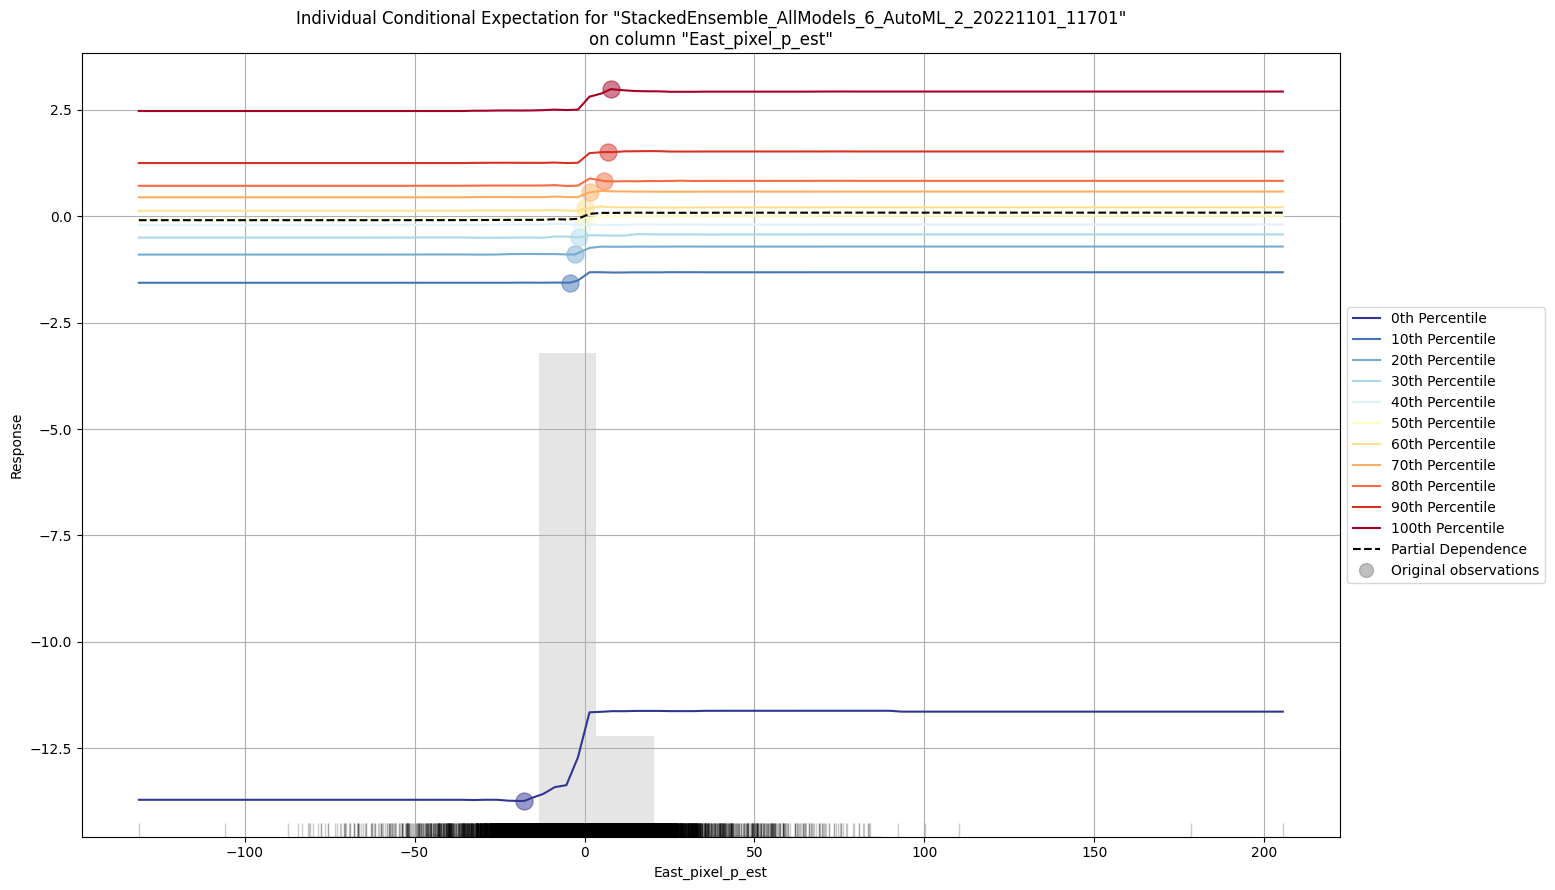

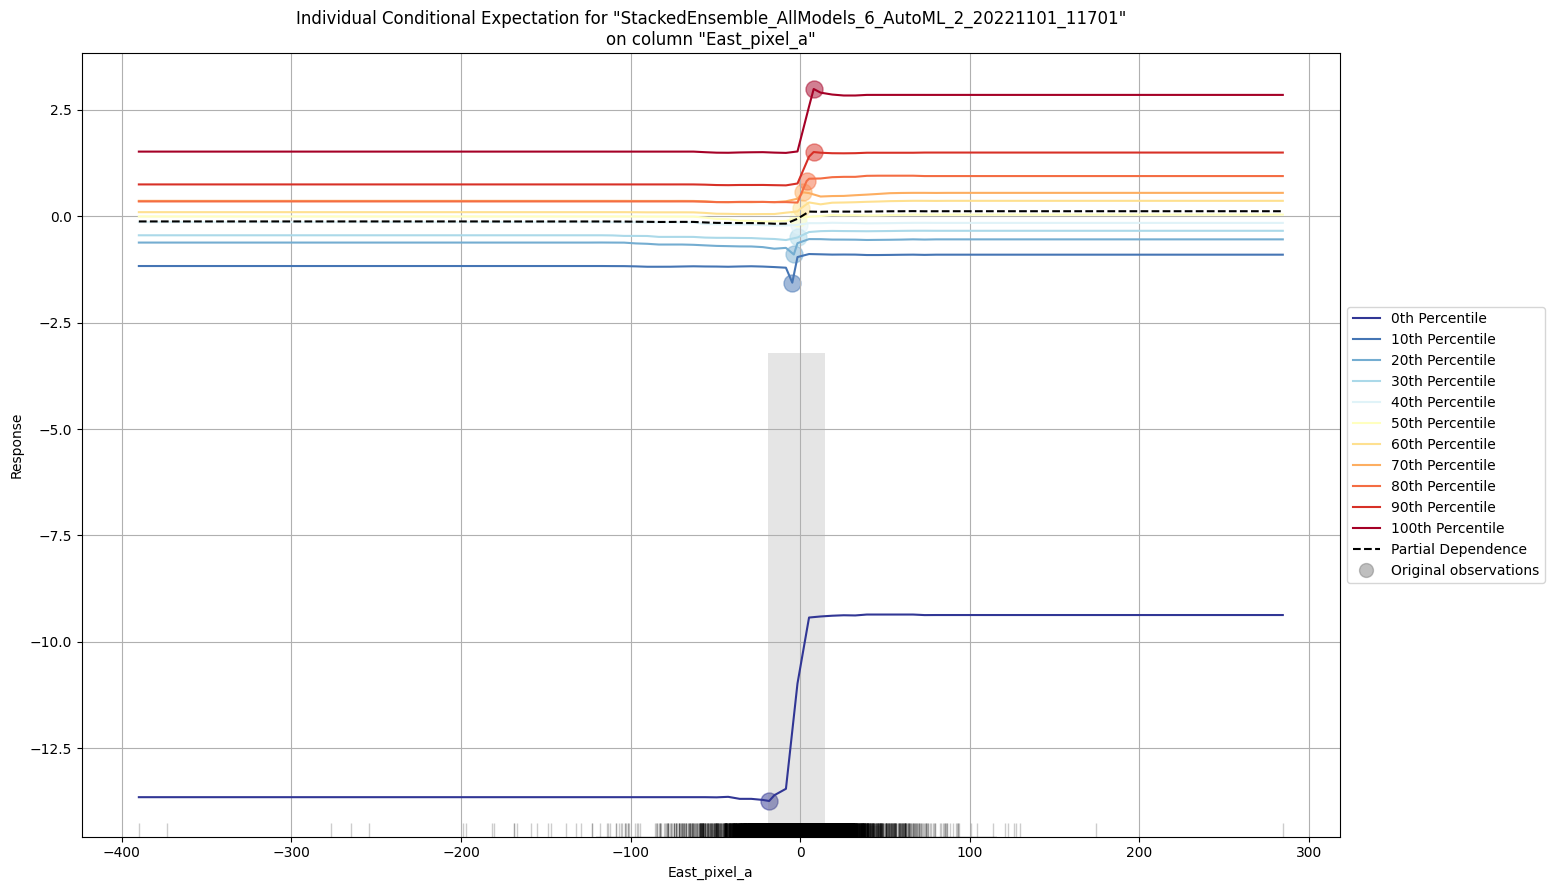

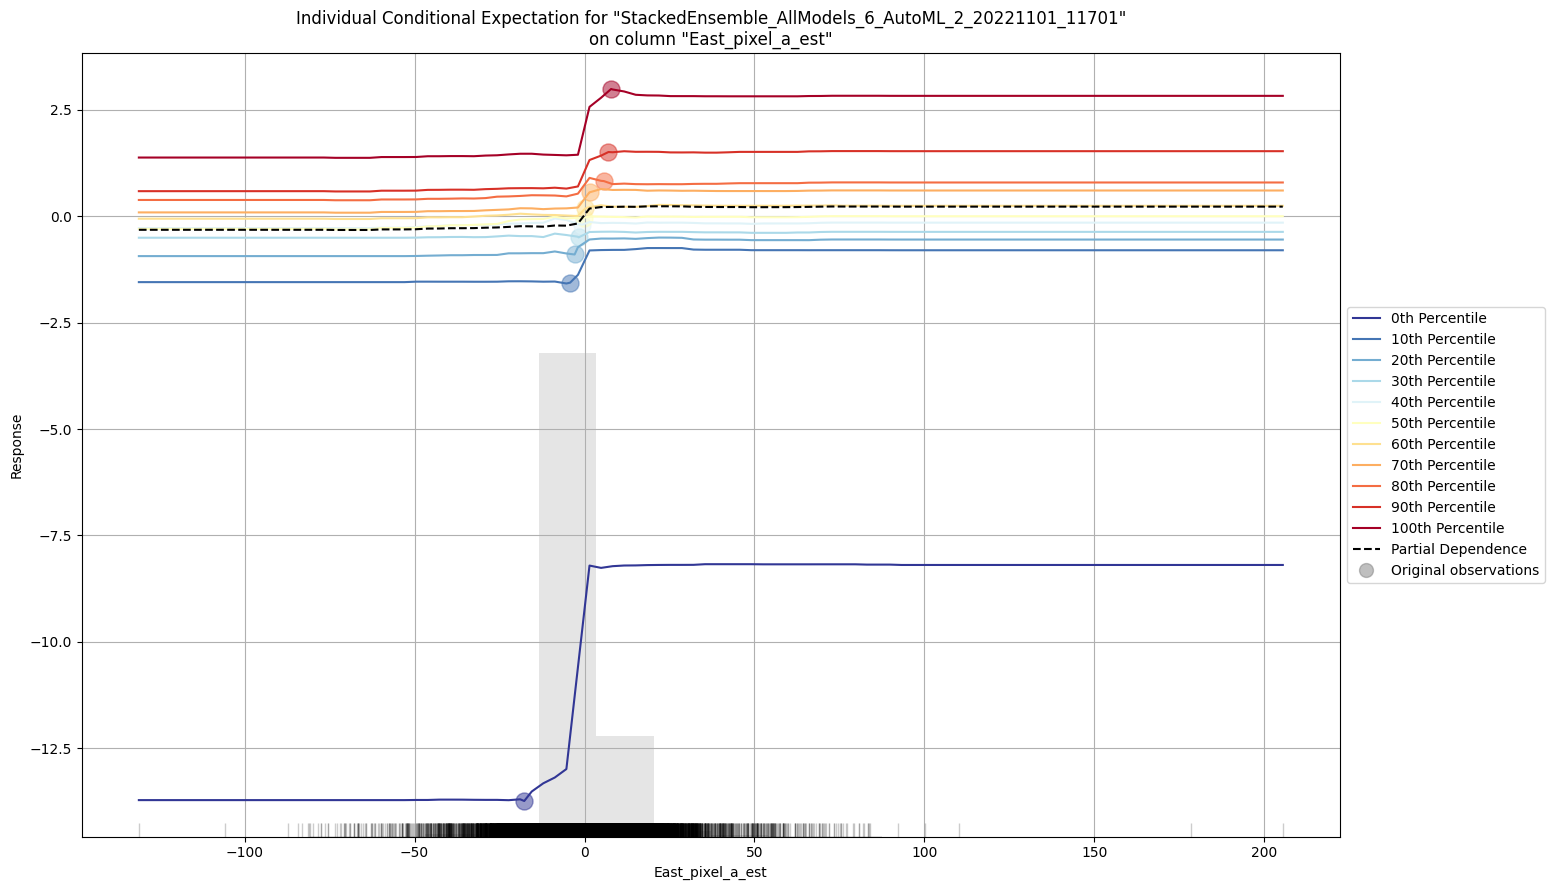

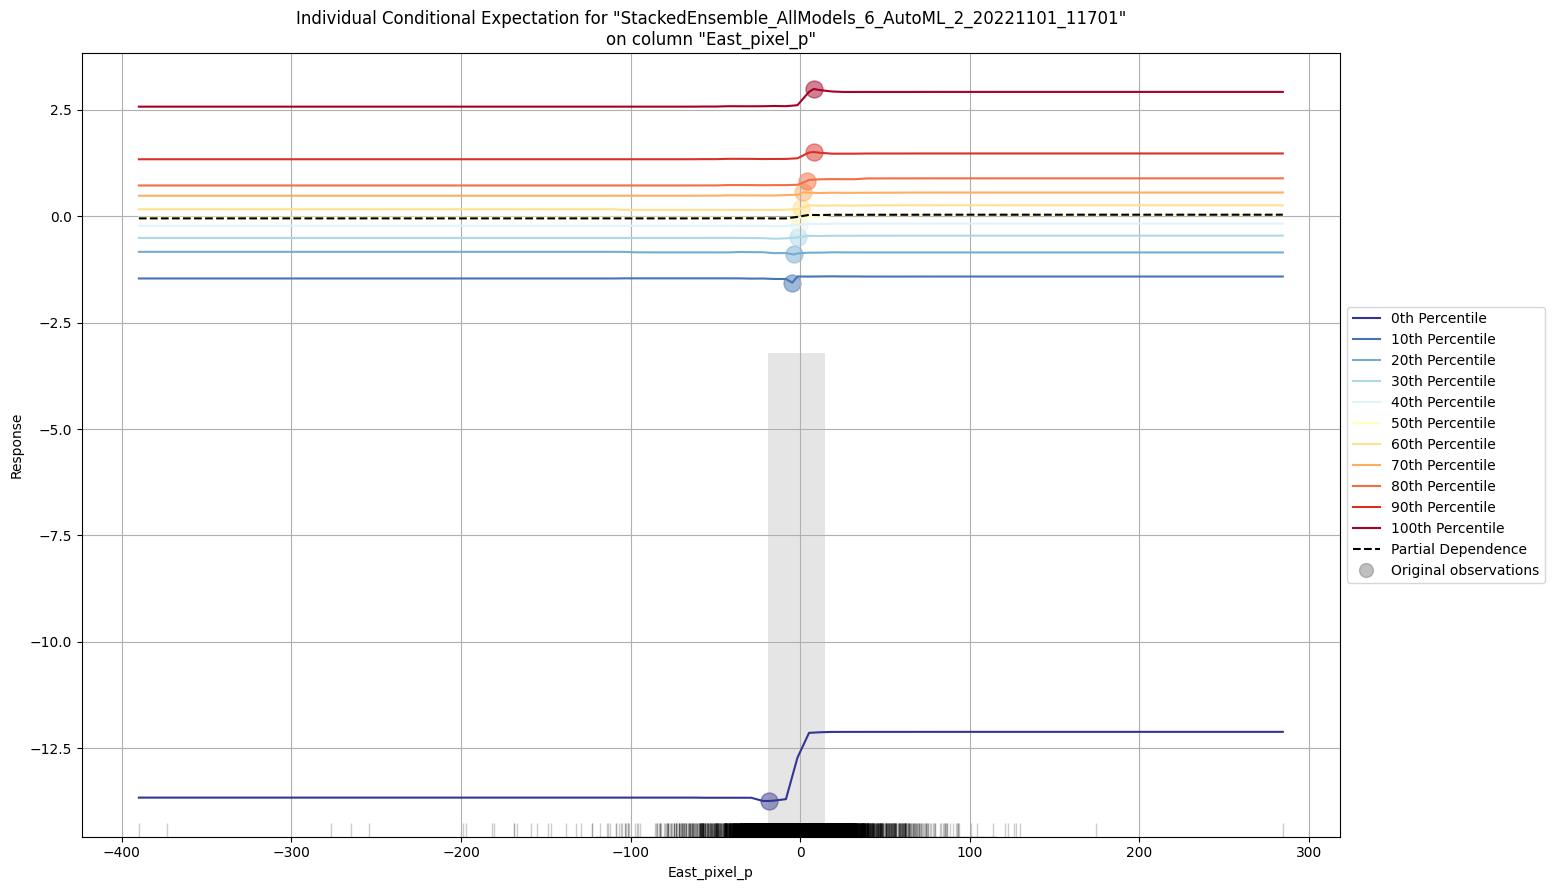

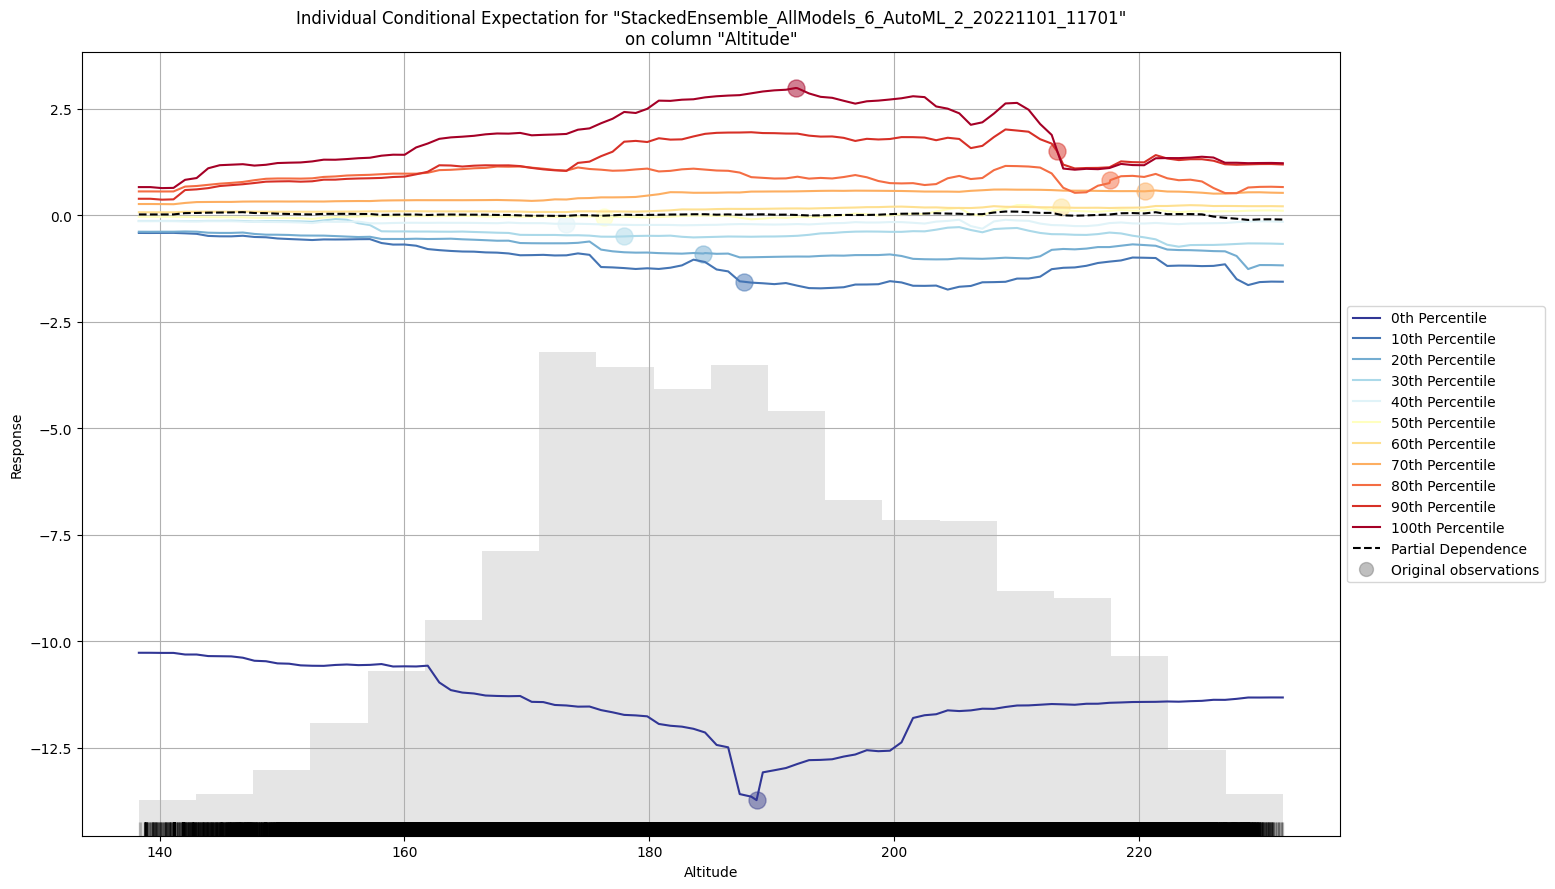

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  rmse         mse        mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  ---------  ----------  ---------  -------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_2_20221101_11701_model_91      0.0243965  0.00059519  0.0152925      nan                0.00059519                8517                   0.000558  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_100     0.035432   0.00125543  0.0221555      nan                0.00125543                9590                   0.000692  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_1       0.042624   0.0018168   0.0287815      nan                0.0018168                 6493                   0.000493  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_19      0.0466179  0.00217323  0.0299019      nan                0.00217323                5796                   0.000514  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_73      0.0473795  0.00224482  0.0320167      nan                0.00224482                6878                   0.000534  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_23      0.0493846  0.00243884  0.0304053      nan                0.00243884                5734                   0.000595  XGBoost
GBM_grid_1_AutoML_2_20221101_11701_model_3           0.0508028  0.00258093  0.0324062      nan                0.00258093               13742                   0.003527  GBM
XGBoost_grid_1_AutoML_2_20221101_11701_model_77      0.052082   0.00271254  0.0330239      nan                0.00271254                5428                   0.000607  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_104     0.0536664  0.00288008  0.0296312      nan                0.00288008               14435                   0.001086  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_10      0.0552776  0.00305561  0.0343361      nan                0.00305561                4359                   0.000566  XGBoost
GBM_grid_1_AutoML_2_20221101_11701_model_96          0.0561418  0.0031519   0.0318846      nan                0.0031519                18526                   0.001496  GBM
XGBoost_grid_1_AutoML_2_20221101_11701_model_7       0.0563849  0.00317926  0.0348585      nan                0.00317926                4141                   0.000578  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_70      0.0590244  0.00348388  0.0355655      nan                0.00348388                4442                   0.000593  XGBoost
StackedEnsemble_AllModels_6_AutoML_2_20221101_11701  0.0602389  0.00362873  0.0333371      nan                0.00362873                7958                   0.043146  StackedEnsemble
XGBoost_grid_1_AutoML_2_20221101_11701_model_3       0.0604109  0.00364948  0.0365763      nan                0.00364948                3797                   0.000525  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_69      0.0622789  0.00387866  0.0392226      nan                0.00387866                9504                   0.000755  XGBoost
XGBoost_grid_1_AutoML_2_20221101_11701_model_53      0.0665833  0.00443334  0.0424879      nan                0.00443334                5130                   0.000623  XGBoost
StackedEnsemble_AllModels_3_AutoML_2_20221101_11701  0.0684589  0.00468662  0.036891       nan                0.00468662                1960                   0.027817  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20221101_11701  0.068462   0.00468705  0.036894       nan                0.00468705                1915                   0.027933  StackedEnsemble
XGBoost_grid_1_AutoML_2_20221101_11701_model_16      0.0684663  0.00468764  0.0432077      nan                0.00468764                5750                   0.000649  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [15]:
east_aml.explain(train)

In [16]:
h2o.shutdown()

H2O session _sid_a005 closed.


/tmp/ipykernel_241310/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [17]:
# !kaggle competitions submit -c kddbr-2022 -f submission_h2o_rco_full.csv -m "RCO Lab 5 Odometria Full"